# 1. **Installs and Imports**

In [1]:
!pip install numpy pandas requests matplotlib seaborn adjustText scipy scikit-learn geopandas folium


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
###########################
# Data Manipulation & I/O #
###########################
import os
import copy
import io
import tempfile
import zipfile
import requests

###########################
# Data Analysis & Handling
###########################
import numpy as np
import pandas as pd

##################
# Visualization  #
##################
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from adjustText import adjust_text  # For label placement in plots

########################################
# Statistical Analysis (Hypothesis etc.)
########################################
from scipy.stats import (
    shapiro,
    spearmanr,
    linregress,
    pearsonr,
    mannwhitneyu,
    levene,
    probplot
)

#####################
# Machine Learning  #
#####################
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

################
# Clustering   #
################
from sklearn.cluster import KMeans

##########################
# Dimensionality Reduction  #
##########################
from sklearn.manifold import TSNE

########################
# Geospatial Analysis  #
########################
import geopandas as gpd
import folium


# **2. Data Acquisition**

In [3]:
# File paths (It might need to be changed, so it matches your own directory)
meat_consumption_file = "datasets/Consumption_of_meat_per_capita.csv"
mortality_file = "datasets/WHOMortalityDatabase_Deaths_sex_age_a_country_area_year-All_Causes.csv"
cardio_mortality_file = "datasets/cardiovascular-disease-death-rate-who-mdb.csv"

# Verify all our datasets exist
for file_path in [meat_consumption_file, mortality_file, cardio_mortality_file]:
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
    else:
        print(f"{file_path} File exists!")

# Loading our datasets w/ proper encoding
meat_df = pd.read_csv(meat_consumption_file, encoding="utf-8")
mortality_df = pd.read_csv(mortality_file, encoding="utf-8", sep=",", skiprows=6, index_col=False) # Skip the metadata rows
cardio_df = pd.read_csv(cardio_mortality_file, encoding="utf-8")


datasets/Consumption_of_meat_per_capita.csv File exists!
datasets/WHOMortalityDatabase_Deaths_sex_age_a_country_area_year-All_Causes.csv File exists!
datasets/cardiovascular-disease-death-rate-who-mdb.csv File exists!


## Data Preview

#### Meat Consumption Data

In [4]:
print("\nMeat Consumption Data Info:")
print(meat_df.info())
print("\nMeat Consumption Data: Are There Any Duplicates?")
print(meat_df.duplicated().any())
print("\nMissing Values in Meat Consumption Data:")
print(meat_df.isnull().sum())
print("\nMeat Consumption Data Preview (Key Columns):")
display(meat_df.head())


Meat Consumption Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            10080 non-null  object 
 1   Year              10080 non-null  int64  
 2   Poultry           10080 non-null  float64
 3   Beef              10079 non-null  float64
 4   Sheep and goat    10080 non-null  float64
 5   Pork              9792 non-null   float64
 6   Other meats       10073 non-null  float64
 7   Fish and seafood  10080 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 630.1+ KB
None

Meat Consumption Data: Are There Any Duplicates?
False

Missing Values in Meat Consumption Data:
Entity                0
Year                  0
Poultry               0
Beef                  1
Sheep and goat        0
Pork                288
Other meats           7
Fish and seafood      0
dtype: int64

Meat Consumption Dat

Entity  Year   Poultry      Beef  Sheep and goat  Pork  Other meats  \
0  Afghanistan  1961  0.641744  4.889479        8.332486   NaN     0.865845   
1  Afghanistan  1962  0.672726  5.106605        8.072717   NaN     0.896969   
2  Afghanistan  1963  0.673156  5.160862        8.251259   NaN     1.091328   
3  Afghanistan  1964  0.683714  5.132955        8.520909   NaN     1.030673   
4  Afghanistan  1965  0.714625  5.094256        8.820517   NaN     1.082147   

   Fish and seafood  
0          0.030559  
1          0.030578  
2          0.030598  
3          0.030614  
4          0.030627

#### Mortality Data

In [5]:
print("\nMortality Data Info:")
print(mortality_df.info())
print("\nMortality Data: Are There Any Duplicates?")
print(mortality_df.duplicated().any())
print("\nMissing Values in Mortality Data:")
print(mortality_df.isnull().sum())
print("\nMortality Data Preview (Key Columns):")
display(mortality_df.head())


Mortality Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Region Code                                                  3813 non-null   object 
 1   Region Name                                                  3813 non-null   object 
 2   Country Code                                                 3813 non-null   object 
 3   Country Name                                                 3813 non-null   object 
 4   Year                                                         3813 non-null   int64  
 5   Sex                                                          3813 non-null   object 
 6   Age group code                                               3813 non-null   object 
 7   Age Group                                               

Region Code Region Name Country Code Country Name  Year     Sex  \
0          EU      Europe          ALB      Albania  2009     All   
1          EU      Europe          ALB      Albania  2009    Male   
2          EU      Europe          ALB      Albania  2009  Female   
3          EU      Europe          ALB      Albania  2010     All   
4          EU      Europe          ALB      Albania  2010    Male   

  Age group code Age Group   Number  \
0        Age_all     [All]  15662.0   
1        Age_all     [All]   8525.0   
2        Age_all     [All]   7137.0   
3        Age_all     [All]  12139.0   
4        Age_all     [All]   6551.0   

   Percentage of cause-specific deaths out of total deaths  \
0                                              100.0         
1                                              100.0         
2                                              100.0         
3                                              100.0         
4                                              100.0         

   Age-standardized death rate per 100 000 standard population  \
0                                         463.339116             
1                                         556.713203             
2                                         378.943075             
3                                         346.632725             
4                                         413.140188             

   Death rate per 100 000 population  
0                         534.991710  
1                         582.492165  
2                         487.505661  
3                         416.714011  
4                         449.417082

#### Cardiovascular Disease Mortality Data

In [6]:
print("\nCardiovascular Disease Mortality Data Info:")
print(cardio_df.info())
print("\nCardiovascular Disease Mortality Data: Are There Any Duplicates?")
print(cardio_df.duplicated().any())
print("\nMissing Values in Cardiovascular Mortality Data:")
print(cardio_df.isnull().sum())
print("\nCardiovascular Disease Mortality Data Preview (Key Columns):")
display(cardio_df.head())


Cardiovascular Disease Mortality Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4776 entries, 0 to 4775
Data columns (total 4 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Entity                                                                                                        4776 non-null   object 
 1   Code                                                                                                          4776 non-null   object 
 2   Year                                                                                                          4776 non-null   int64  
 3   Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people  4776 non-null   float64
dtypes: float64

Entity Code  Year  \
0  Albania  ALB  1987   
1  Albania  ALB  1988   
2  Albania  ALB  1989   
3  Albania  ALB  1992   
4  Albania  ALB  1993   

   Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people  
0                                          331.37842                                                             
1                                          333.62150                                                             
2                                          339.13010                                                             
3                                          289.65850                                                             
4                                          264.37045

# **3. Data Cleaning & Merging**

## Renaming Columns & Removing Unnecessary Columns

In [7]:
# Rename columns for consistency
meat_df.rename(columns={"Entity": "Country",}, inplace=True)

mortality_df.rename(columns={"Country Name": "Country",
                            "Age-standardized death rate per 100 000 standard population": "Age-standardized mortality rate"},
                    inplace=True)

cardio_df.rename(
    columns={
        "Age-standardized deaths from cardiovascular diseases in both sexes in those aged all ages per 100,000 people": "Age-standardized cardiovascular mortality rate",
        "Entity": "Country",
        "Code": "Country Code"},
    inplace=True)

# Drop unnecessary columns from the overall mortality rate dataframe
# The columns "Age group code", "Age Group", and "Percentage of cause-specific deaths out of total deaths"
# contain only one unique value, so they do not contribute any useful information
mortality_df = mortality_df.drop(["Age group code", "Age Group", "Percentage of cause-specific deaths out of total deaths", "Death rate per 100 000 population"], axis=1)

display(meat_df.head())
display(mortality_df.head())
display(cardio_df.head())

Country  Year   Poultry      Beef  Sheep and goat  Pork  Other meats  \
0  Afghanistan  1961  0.641744  4.889479        8.332486   NaN     0.865845   
1  Afghanistan  1962  0.672726  5.106605        8.072717   NaN     0.896969   
2  Afghanistan  1963  0.673156  5.160862        8.251259   NaN     1.091328   
3  Afghanistan  1964  0.683714  5.132955        8.520909   NaN     1.030673   
4  Afghanistan  1965  0.714625  5.094256        8.820517   NaN     1.082147   

   Fish and seafood  
0          0.030559  
1          0.030578  
2          0.030598  
3          0.030614  
4          0.030627

Region Code Region Name Country Code  Country  Year     Sex   Number  \
0          EU      Europe          ALB  Albania  2009     All  15662.0   
1          EU      Europe          ALB  Albania  2009    Male   8525.0   
2          EU      Europe          ALB  Albania  2009  Female   7137.0   
3          EU      Europe          ALB  Albania  2010     All  12139.0   
4          EU      Europe          ALB  Albania  2010    Male   6551.0   

   Age-standardized mortality rate  
0                       463.339116  
1                       556.713203  
2                       378.943075  
3                       346.632725  
4                       413.140188

Country Country Code  Year  Age-standardized cardiovascular mortality rate
0  Albania          ALB  1987                                       331.37842
1  Albania          ALB  1988                                       333.62150
2  Albania          ALB  1989                                       339.13010
3  Albania          ALB  1992                                       289.65850
4  Albania          ALB  1993                                       264.37045

## Investigating the Null Values Present in the Data

#### Null Values in Pork Column of Meat Consumption Data

In [8]:
# Check which countries have some null values for pork consumption
print("COUNTRIES THAT HAVE NULL VALUES FOR PORK:\n")
null_pork_countries = meat_df[meat_df["Pork"].isnull()]["Country"].unique()

# Check if the countries that have null values for pork consumption have only null values for pork consumption
# and for which year(s) the null value(s) is/are
print("Country, Year(s): Are all values null?\n")
some_pork_val_countries = []
for country in null_pork_countries:
    is_only_null = meat_df.loc[meat_df["Country"] == country, "Pork"].isnull().all()
    if is_only_null:
        print(f"{country}, All: {is_only_null}")
    else:
        years_null = meat_df.loc[(meat_df["Country"] == country) & (meat_df["Pork"].isnull()), "Year"]
        years_null = sorted(list(years_null))
        print(f"{country}, {years_null}: {is_only_null}")
        some_pork_val_countries.append(country)

COUNTRIES THAT HAVE NULL VALUES FOR PORK:

Country, Year(s): Are all values null?

Afghanistan, [1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]: False
Kuwait, [1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]: False
Mauritania, [2010, 2012, 2014, 2017, 2018, 2019, 2020, 2021]: False
Saudi Arabia, All: True
Sudan (former), All: True
Tunisia, [2018]: False
United Arab Emirates, [1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 19

In [9]:
# Check if all the values for pork consumption that are not null are not all equal to 0
print("Are the non-null values for pork consumption only 0s for the corresponding countries?\n")
for country in null_pork_countries:
    only_zero = ((meat_df[meat_df["Country"] == country]["Pork"]) == 0).all()
    print(f"{country}: {only_zero}")

Are the non-null values for pork consumption only 0s for the corresponding countries?

Afghanistan: False
Kuwait: False
Mauritania: False
Saudi Arabia: False
Sudan (former): False
Tunisia: False
United Arab Emirates: False


#### Null Values in Beef Column of Meat Consumption Data

In [10]:
# Check which countries have some null values for beef consumption
print("COUNTRIES THAT HAVE NULL VALUES FOR BEEF:\n")
null_beef_countries = meat_df[meat_df["Beef"].isnull()]["Country"].unique()

# Check if the country that has null values for beef consumption has only null values for beef consumption
# and for which year(s) the null value(s) is/are
print("Country, Year(s): Are all values null?\n")
is_only_null = meat_df.loc[meat_df["Country"] == null_beef_countries[0], "Beef"].isnull().all()
years_null = meat_df.loc[(meat_df["Country"] == null_beef_countries[0]) & (meat_df["Beef"].isnull()), "Year"]
years_null = sorted(list(years_null))
print(f"{null_beef_countries[0]}, {years_null}: {is_only_null}")

COUNTRIES THAT HAVE NULL VALUES FOR BEEF:

Country, Year(s): Are all values null?

Kiribati, [2020]: False


#### Null Values in Other Meats Column of Meat Consumption Data

In [11]:
# Check which countries have null values for other meats consumption
print("COUNTRIES THAT HAVE NULL VALUES FOR OTHER MEATS:\n")
null_other_meats_countries = meat_df[meat_df["Other meats"].isnull()]["Country"].unique()

# Check if the countries that have null values for beef consumption have only null values for beef consumption
# and for which year(s) the null value(s) is/are
print("Country, Year(s): Are all values null?\n")
for country in null_other_meats_countries:
    is_only_null = meat_df.loc[meat_df["Country"] == country, "Other meats"].isnull().all()
    years_null = meat_df.loc[(meat_df["Country"] == country) & (meat_df["Other meats"].isnull()), "Year"]
    years_null = sorted(list(years_null))
    print(f"{country}, {years_null}: {is_only_null}")


COUNTRIES THAT HAVE NULL VALUES FOR OTHER MEATS:

Country, Year(s): Are all values null?

Bhutan, [2019, 2020]: False
East Timor, [2010, 2011, 2012, 2013]: False
Kiribati, [2020]: False


#### Null Values in Age-Standardized Mortality Rate Column of Mortality Data

In [12]:
# Check which countries have null values for age-standardized mortality rate
print("COUNTRIES THAT HAVE SOME NULL VALUES FOR AGE-STANDARDIZED MORTALITY RATE:\n")
unique_sex_labels = mortality_df["Sex"].unique()
null_mortality_countries_per_sex = {}
for label in unique_sex_labels:
    countries = mortality_df.loc[
    (mortality_df["Age-standardized mortality rate"].isnull()) &
    (mortality_df["Sex"] == label),
    "Country"
        ].unique()
    null_mortality_countries_per_sex[label] = countries


# Check if the countries that have null values for age-standardized mortality rate have only null values
# for age-standardized mortality rate and for which year(s) the null value(s) is/are
print("Country, Year(s): Are all values null?")
for label in unique_sex_labels:
    print(f"\nSEX LABEL: {label}\n")
    for country in null_mortality_countries_per_sex[label]:
        is_only_null = mortality_df.loc[(mortality_df["Country"] == country) & (mortality_df["Sex"] == label), "Age-standardized mortality rate"].isnull().all()
        years_null = mortality_df.loc[(mortality_df["Country"] == country) & (mortality_df["Sex"] == label) & (mortality_df["Age-standardized mortality rate"].isnull()), "Year"]
        years_null = sorted(list(years_null))
        print(f"{country}, {years_null}: {is_only_null}")

COUNTRIES THAT HAVE SOME NULL VALUES FOR AGE-STANDARDIZED MORTALITY RATE:

Country, Year(s): Are all values null?

SEX LABEL: All

Dominica, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]: True
Saint Kitts and Nevis, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]: True

SEX LABEL: Male

Dominica, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]: True
Saint Kitts and Nevis, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]: True

SEX LABEL: Female

Dominica, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]: True
Saint Kitts and Nevis, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]: True

SEX LABEL: Unknown

Argentina, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]: True
Bahrain, [2011, 2012]: True
Barbados, [2011, 2013]: True
Belize, [2010]: True
Brazil, [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]: True
Chile, [2013, 2014, 2015, 2016, 2017, 2018, 2019

## Filtering and Cleaning Data Related to European Countries and Years

#### Filtering and Renaming the European Countries

In [13]:
# Andorra, Kosovo, Lichtenstein, Monaco, San Marino, Vatican City are also countries, which are usually
# considered part of Europe. For example, all of these, except Kosovo and Vatican City, are considered countries
# according to the UN (https://unstats.un.org/unsd/methodology/m49/). However, all six countries do not
# appear in either the mortality rate, meat consumption or the mortality rate from cardiovascular diseases datasets.

# Kazakhstan, Armenia, Azerbaijan, Cyprus, Georgia, Turkey are considered part of Asia based on the mortality rate dataset.
# They could be considered as part of Europe in the sense that they are very dependent on Europe in terms of economic relations, etc.,
# but are not considered European countries according to the UN.

# A lot of the mortality data for the period considered (2009 to 2019) is missing for Albania, Bosnia and Herzegovina,
# and Montenegro, so we decided to exclude those European countries from our analysis.

# Filter European countries dynamically from the WHO dataset
european_countries = mortality_df[(mortality_df["Region Name"] == "Europe") & \
    	                          (mortality_df["Country"] != "Albania") & \
                                  (mortality_df["Country"] != "Bosnia and Herzegovina") & \
                                  (mortality_df["Country"] != "Montenegro")]["Country"].unique()
print(f"Total European Countries: {len(european_countries)}\n")
print("Initial List of European Countries:")
print(european_countries)

Total European Countries: 36

Initial List of European Countries:
['Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Croatia' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta'
 'Republic of Moldova' 'Netherlands' 'North Macedonia' 'Norway' 'Poland'
 'Portugal' 'Romania' 'Russian Federation' 'Serbia' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Ukraine'
 'United Kingdom of Great Britain and Northern Ireland']


In [14]:
# Rename some of the European countries to ensure consistency between the three dataframes
mortality_df["Country"] = mortality_df["Country"].replace("Republic of Moldova", "Moldova")
mortality_df["Country"] = mortality_df["Country"].replace("Russian Federation", "Russia")
mortality_df["Country"] = mortality_df["Country"].replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")

# Filter European countries dynamically from the WHO dataset again
european_countries = mortality_df[(mortality_df["Region Name"] == "Europe") & \
    	                          (mortality_df["Country"] != "Albania") & \
                                  (mortality_df["Country"] != "Bosnia and Herzegovina") & \
                                  (mortality_df["Country"] != "Montenegro")]["Country"].unique()
print(f"Total European Countries: {len(european_countries)}\n")
print("Final List of European Countries (after renaming):")
print(european_countries)

Total European Countries: 36

Final List of European Countries (after renaming):
['Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Croatia' 'Czechia' 'Denmark'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Ireland' 'Italy' 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russia' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Ukraine' 'United Kingdom']


In [15]:
# Filter meat_df, mortality_df, and cardio_df using the identified European countries
meat_df = meat_df[meat_df["Country"].isin(european_countries)]
mortality_df = mortality_df[mortality_df["Country"].isin(european_countries)]
cardio_df = cardio_df[cardio_df["Country"].isin(european_countries)]

In [16]:
# Check whether all and only European countries from the list above appear in all dataframes
print("Do all and only European countries from the list above appear in all dataframes?\n")
meat_unique_countries = meat_df["Country"].unique()
print(f"Meat Consumption Data: {len(meat_unique_countries)}")
mortality_unique_countries = mortality_df["Country"].unique()
print(f"Mortality Data: {len(mortality_unique_countries)}")
cardio_unique_countries = cardio_df["Country"].unique()
print(f"Cardiovascular Disease Mortality Data: {len(cardio_unique_countries)}")

Do all and only European countries from the list above appear in all dataframes?

Meat Consumption Data: 36
Mortality Data: 36
Cardiovascular Disease Mortality Data: 36


#### Filtering the Years

In [17]:
# Filter datasets for the years 2009–2019
meat_df = meat_df[meat_df["Year"].between(2009, 2019)].reset_index(drop=True)
mortality_df = mortality_df[mortality_df["Year"].between(2009, 2019)].reset_index(drop=True)
cardio_df = cardio_df[cardio_df["Year"].between(2009, 2019)].reset_index(drop=True)

#### Dropping Uninformative Rows

In [18]:
# Removing rows with null values since after the filtering, they only consist of data where
# the Sex is Unknown and thus the mortality rate is null.
mortality_df = mortality_df.dropna()

In [19]:
# Check whether there are any null values remaining in any dataframes
print("Are there any remaining null values?\n")
print(f"Meat Consumption Data: {meat_df.isnull().values.any()}")
print(f"Mortality Data: {mortality_df.isnull().values.any()}")
print(f"Cardiovascular Disease Mortality Data: {cardio_df.isnull().values.any()}")


Are there any remaining null values?

Meat Consumption Data: False
Mortality Data: False
Cardiovascular Disease Mortality Data: False


## Checking if Null Values Emerge Upon Merging Meat Consumption Dataframe with Mortality Dataframe (with no Sex Categorization)

In [20]:
# Filter out the rows with Female and Male in Sex columns in mortality_df since they do not have matching rows in meat_df (or cardio_df)
filtered_mortality_df = mortality_df[mortality_df["Sex"] == "All"]
meat_mortality_df = pd.merge(meat_df, filtered_mortality_df, on=["Country", "Year"], how="outer")

print(f"How many null values emerge? {meat_mortality_df.isnull().values.sum()}\n")

print(f"For which countries and years do the null values emerge?\n")
missing_country_data = meat_mortality_df[meat_mortality_df.isnull().any(axis=1)]["Country"].unique()
for country in missing_country_data:
    years_null = meat_mortality_df.loc[
        (meat_mortality_df["Country"] == country) & meat_mortality_df.isnull().any(axis=1),
        "Year"]
    years_null = sorted(list(years_null))
    print(f"{country}: {years_null}")

How many null values emerge? 84

For which countries and years do the null values emerge?

Belarus: [2012, 2015, 2016, 2017, 2019]
Moldova: [2019]
North Macedonia: [2014]
Norway: [2017, 2018, 2019]
Slovakia: [2011, 2015]
Ukraine: [2013, 2016]


In [21]:
missing_pairs = {
"Belarus": [2012, 2015, 2016, 2017, 2019],
"Moldova": [2019],
"North Macedonia": [2014],
"Norway": [2017, 2018, 2019],
"Slovakia": [2011, 2015],
"Ukraine": [2013, 2016],
}

## Dealing with Null Values for European Countries

#### Investigating the Trend of the Mortality Data

Based on the plots below, the age-standardized mortality rate was decreasing from 2009 to 2019 in all European countries.

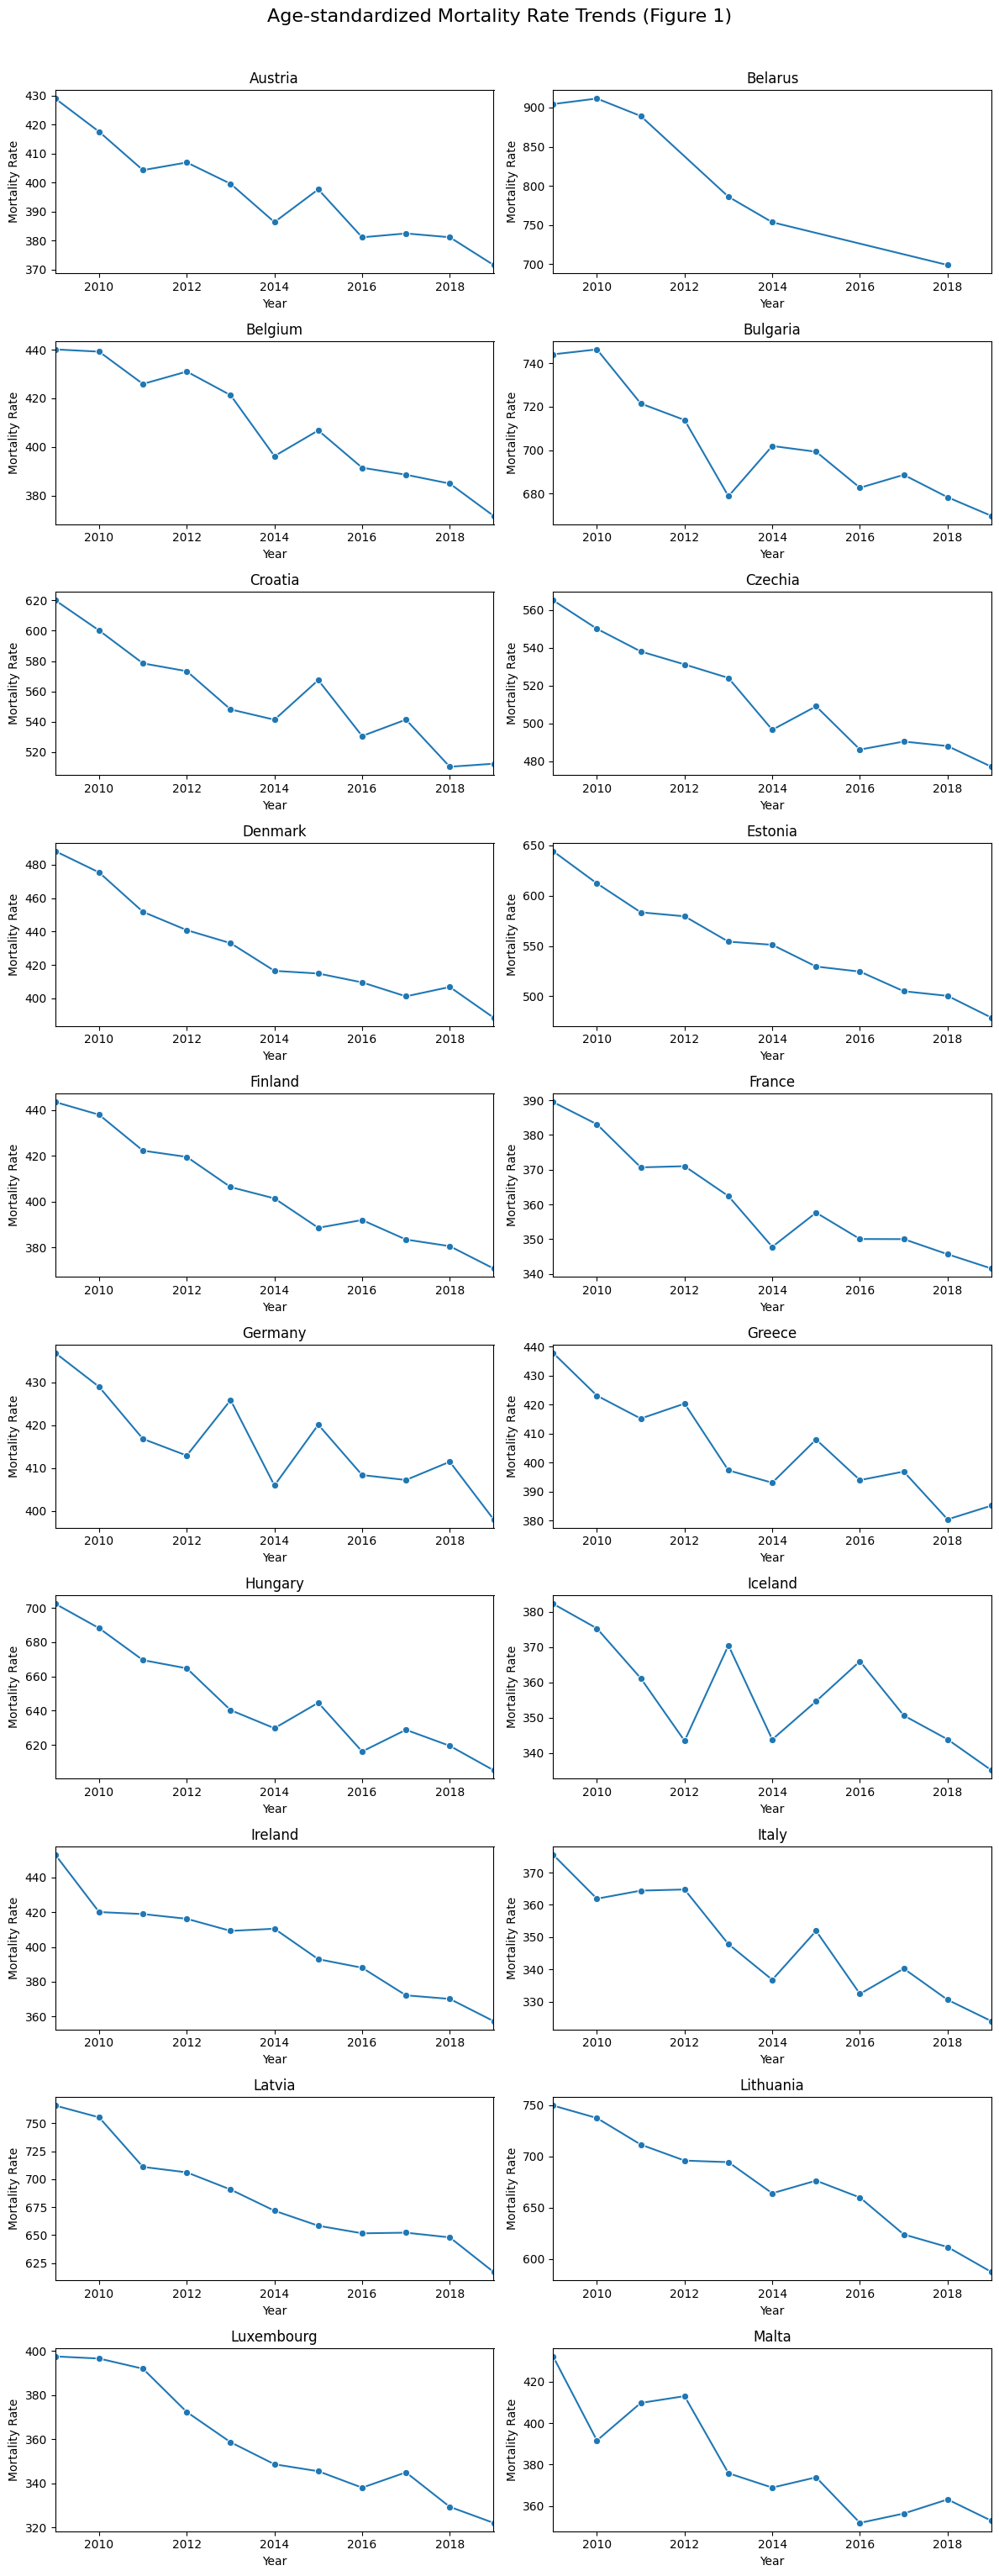

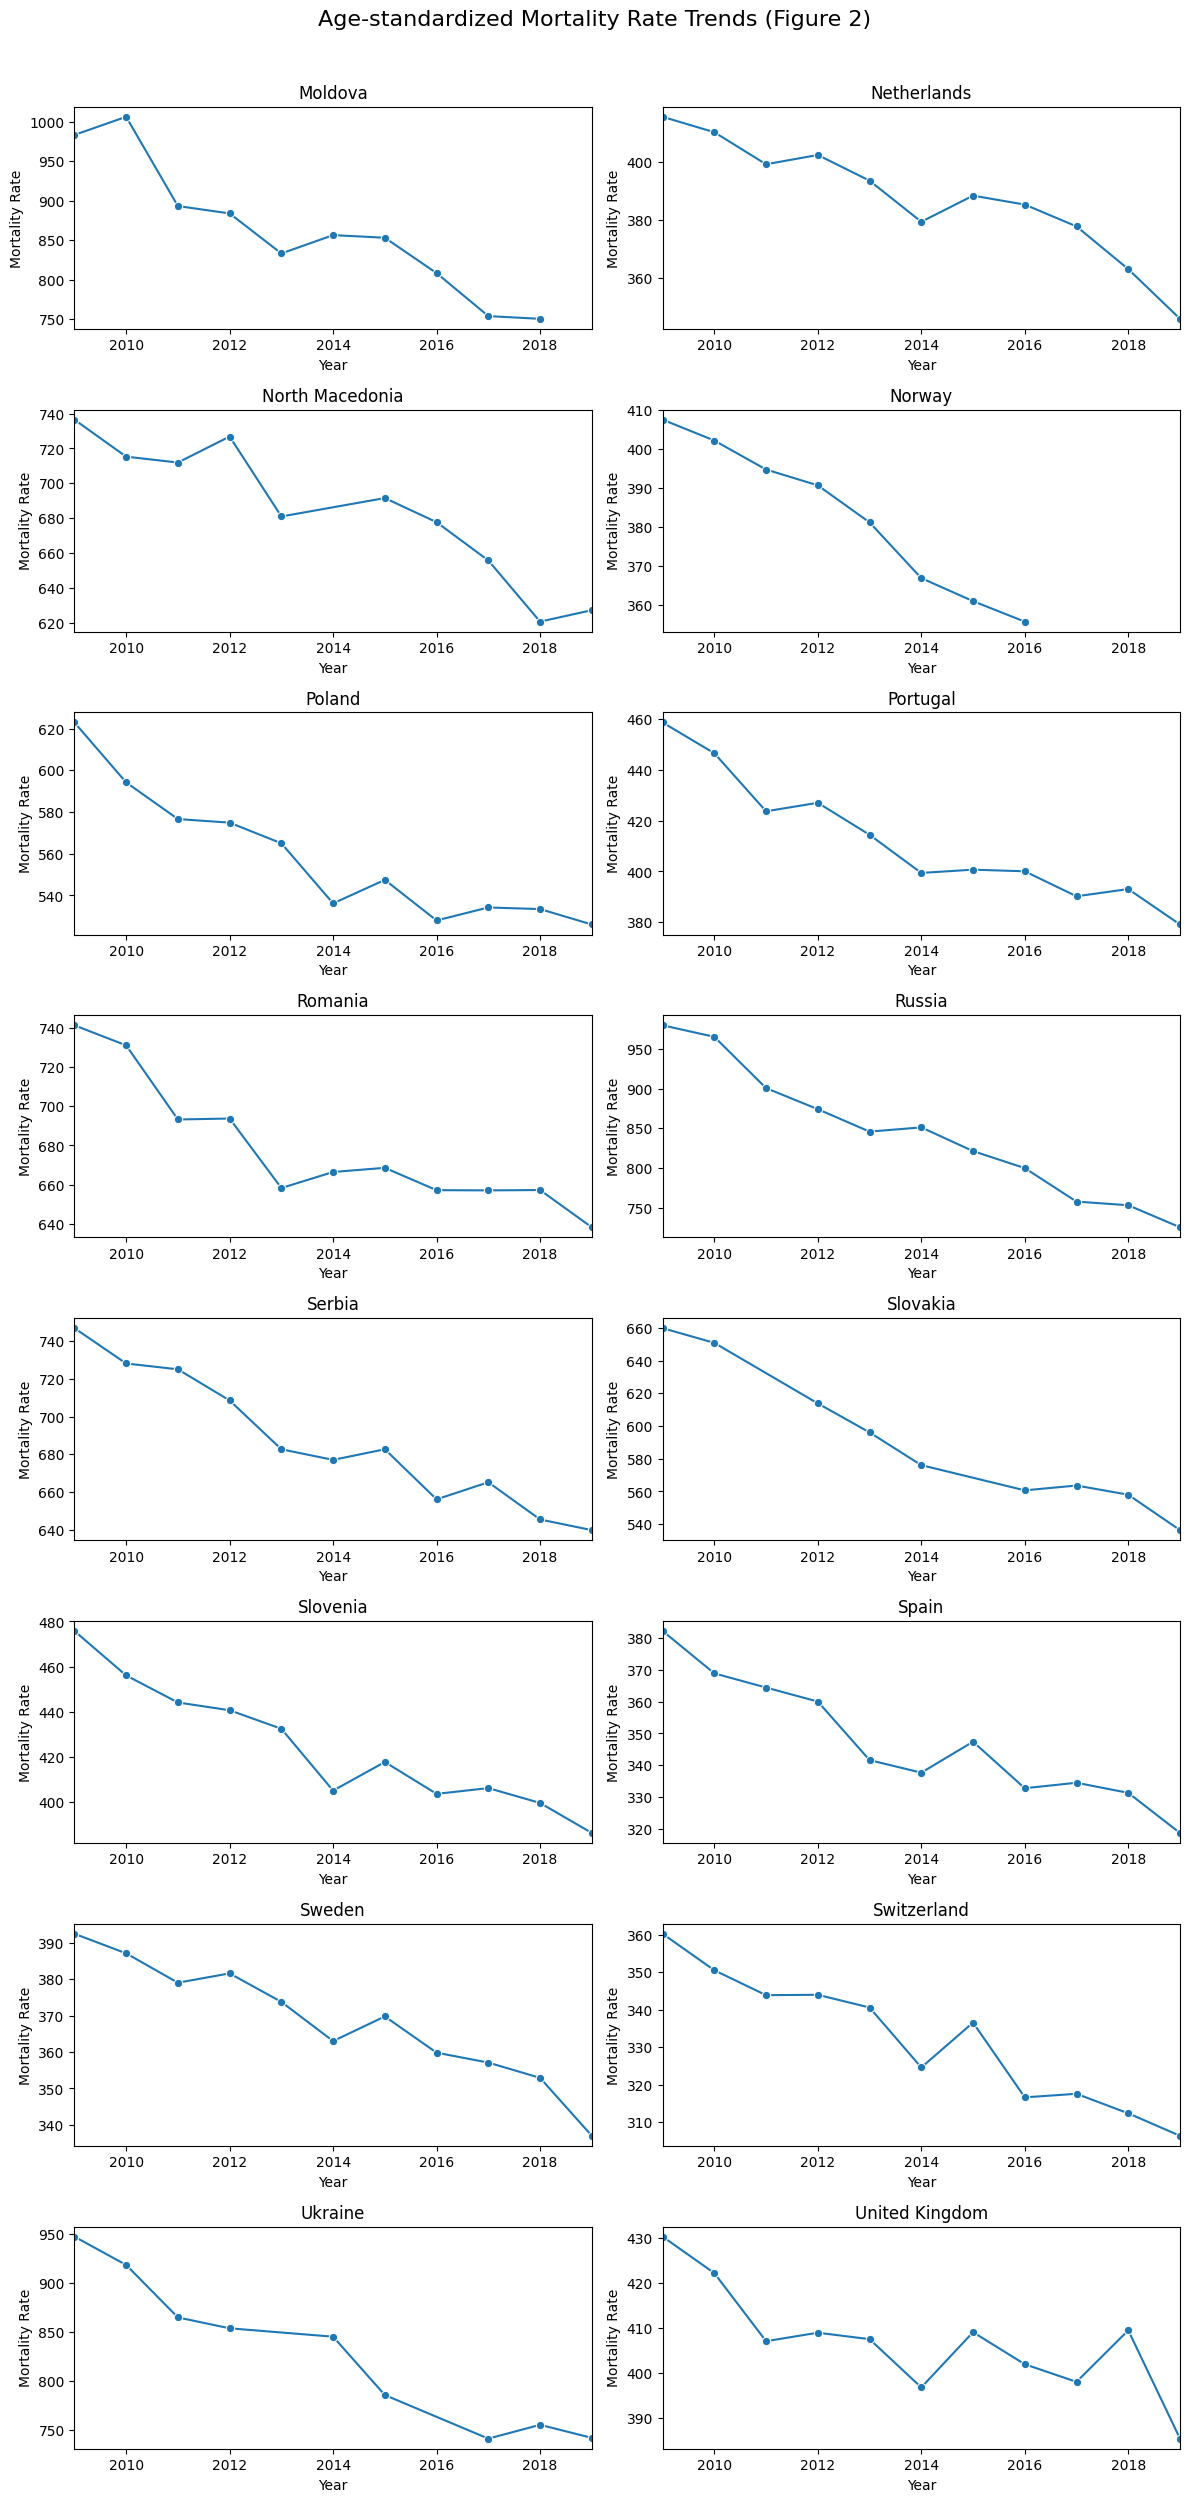

All figures have been saved in the 'mortality_rate_trends' directory.


In [22]:
output_dir = "mortality_rate_trends"
os.makedirs(output_dir, exist_ok=True)

# Split countries into chunks of 20 for multiple figures
chunks = [european_countries[i:i + 20] for i in range(0, len(european_countries), 20)]

# Loop through each chunk to create and save figures
for fig_index, chunk in enumerate(chunks):
    fig, axes = plt.subplots(10, 2, figsize=(12, 30))  # Create a 10x2 grid
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Loop through the countries in the current chunk
    for i, country in enumerate(chunk):
        tmp = mortality_df[(mortality_df["Country"] == country) & (mortality_df["Sex"] == "All")]
        tmp = tmp.sort_values("Year")
        sns.lineplot(data=tmp, x="Year", y="Age-standardized mortality rate", ax=axes[i], marker="o")
        axes[i].set_title(country)
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel("Mortality Rate")
        axes[i].set_xlim(2009, 2019)

    # Hide any unused subplots
    for j in range(len(chunk), len(axes)):
        fig.delaxes(axes[j])

    # Save the figure to the output directory
    plot_filename = os.path.join(output_dir, f"mortality_rate_trends_figure_{fig_index + 1}.png")
    plt.tight_layout()
    plt.suptitle(f"Age-standardized Mortality Rate Trends (Figure {fig_index + 1})", y=1.02, fontsize=16)
    plt.savefig(plot_filename)
    plt.show()
    plt.close(fig)

print(f"All figures have been saved in the '{output_dir}' directory.")


#### Regression Models for Predicting the Mortality Rate for Missing Years in the Mortality Data

Predicted Age-standardized mortality rate for 2012 in Belarus: 826.53
Predicted Age-standardized mortality rate for 2015 in Belarus: 747.36
Predicted Age-standardized mortality rate for 2016 in Belarus: 726.48
Predicted Age-standardized mortality rate for 2017 in Belarus: 708.36
Predicted Age-standardized mortality rate for 2019 in Belarus: 680.39


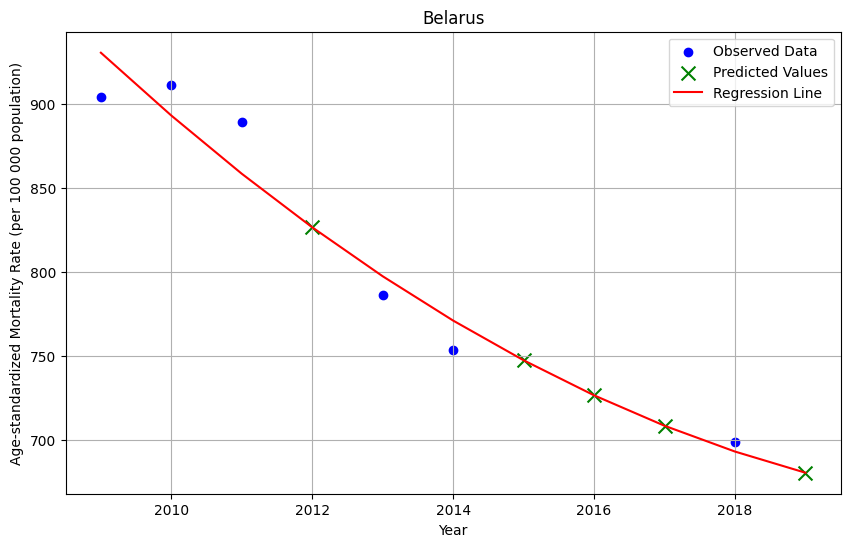

Predicted Age-standardized mortality rate for 2019 in Moldova: 738.14


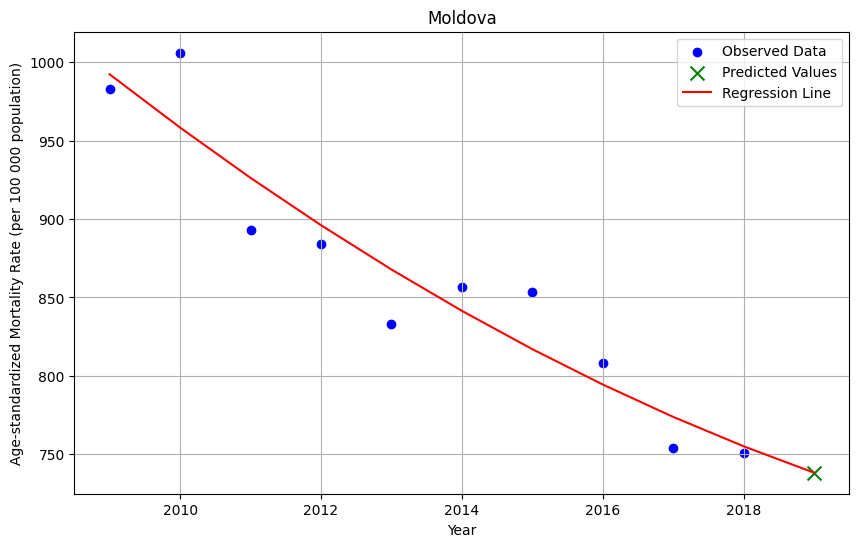

Predicted Age-standardized mortality rate for 2014 in North Macedonia: 692.11


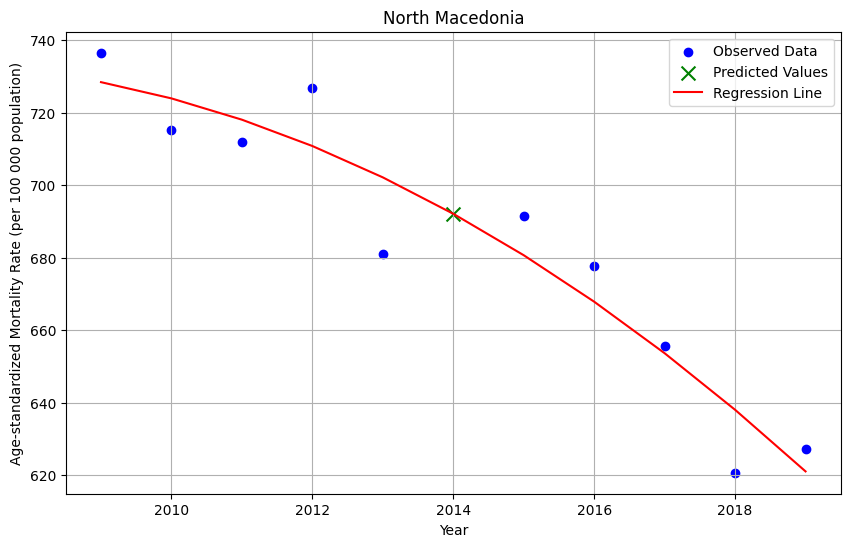

Predicted Age-standardized mortality rate for 2017 in Norway: 343.63
Predicted Age-standardized mortality rate for 2018 in Norway: 333.47
Predicted Age-standardized mortality rate for 2019 in Norway: 322.85


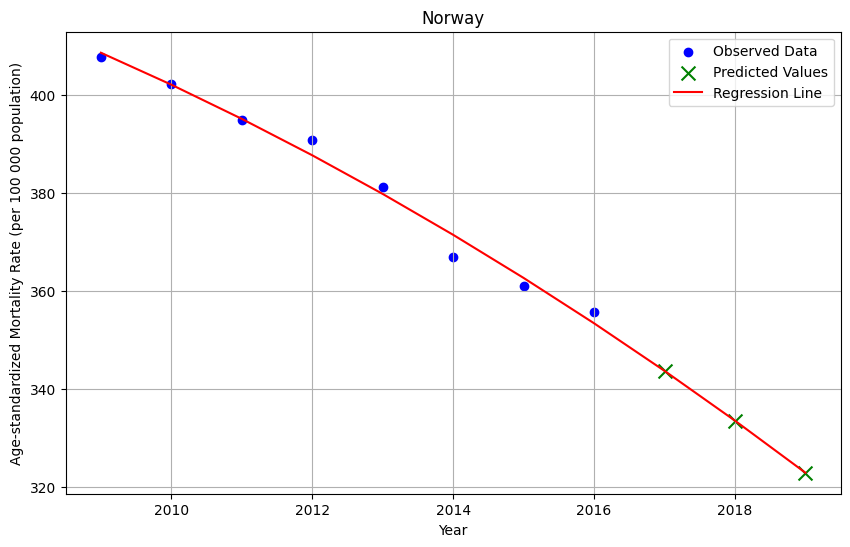

Predicted Age-standardized mortality rate for 2011 in Slovakia: 627.27
Predicted Age-standardized mortality rate for 2015 in Slovakia: 573.42


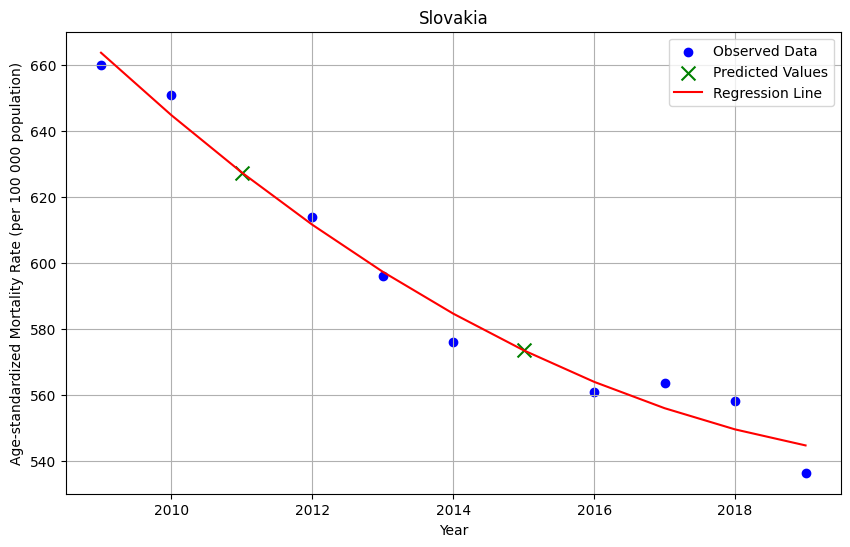

Predicted Age-standardized mortality rate for 2013 in Ukraine: 834.13
Predicted Age-standardized mortality rate for 2016 in Ukraine: 776.00


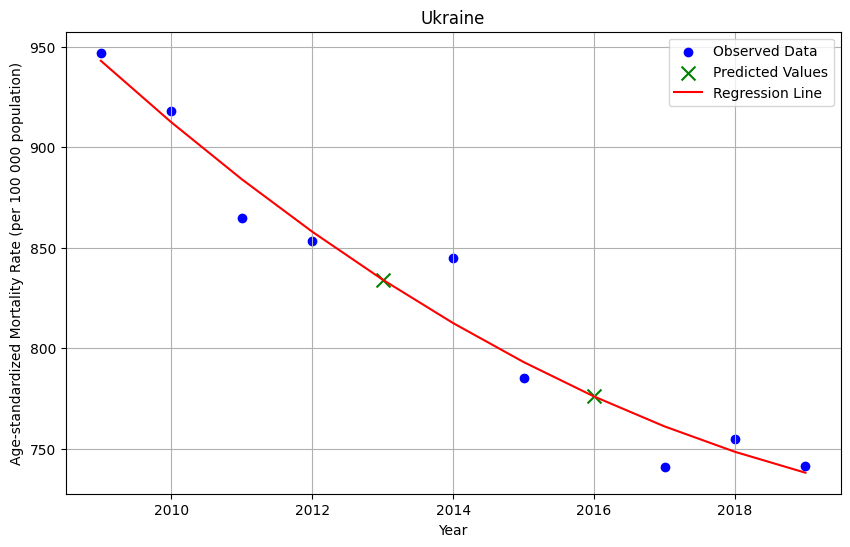

All plots have been saved in the 'regression_plots' Folder.


In [23]:
output_dir = "regression_plots"
os.makedirs(output_dir, exist_ok=True)
mortality_for_prediction = mortality_df[mortality_df["Year"].between(2000, 2019)].reset_index(drop=True)

# Loop through the countries with missing data for certain years
for country, missing in missing_pairs.items():
    pred_df = mortality_for_prediction[
        (mortality_for_prediction["Country"] == country) &
        (mortality_for_prediction["Sex"] == 'All')
    ]
    pred_df = pred_df.sort_values("Year")

    # Independent variables - year / dependent variable - mortality rate
    X = pred_df["Year"].values.reshape(-1, 1)
    y = pred_df["Age-standardized mortality rate"].values

    # Fit the model
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(X, y)

    # Predict missing years
    missing_years = np.array(missing).reshape(-1, 1)
    predictions = model.predict(missing_years)

    # Print predictions
    for year, rate in zip(missing_years.flatten(), predictions):
        print(f"Predicted Age-standardized mortality rate for {year} in {country}: {rate:.2f}")

    # Combine observed and missing years for sorting
    all_years = np.concatenate([X, missing_years])
    sorted_indices = np.argsort(all_years.flatten())
    sorted_years = all_years[sorted_indices]
    sorted_predictions = model.predict(sorted_years)

    # Create and save the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a new figure for each country
    ax.scatter(X, y, color="blue", label="Observed Data")
    ax.scatter(missing_years, predictions, color="green", label="Predicted Values", marker="x", s=100)
    ax.plot(sorted_years, sorted_predictions, color="red", label="Regression Line")
    ax.set_title(f"{country}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Age-standardized Mortality Rate (per 100 000 population)")
    ax.legend()
    ax.grid()

    # Save the plot
    plot_filename = os.path.join(output_dir, f"{country}_mortality_regression_plot.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close(fig)


print(f"All plots have been saved in the '{output_dir}' Folder.")


#### Filling in the Missing Rows (Years) in the Mortality Data

In [24]:
for idx, (country, missing) in enumerate(missing_pairs.items()):
    for sex in ["All", "Male", "Female"]:
        # Filter data for the specific country and sex
        pred_df = mortality_for_prediction[
            (mortality_for_prediction["Country"] == country) &
            (mortality_for_prediction["Sex"] == sex)
        ].sort_values("Year")

        # Extract region and country info
        country_code = pred_df["Country Code"].iloc[0]

        # Prepare data for regression
        X = pred_df["Year"].values.reshape(-1, 1)
        y1 = pred_df["Age-standardized mortality rate"].values
        y2 = pred_df["Number"].values

        # Fit regression models for rate
        model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
        model.fit(X, y1)  # Fit for rate
        missing_years = np.array(missing).reshape(-1, 1)
        predictions_rate = model.predict(missing_years)

        # Fit for number
        model.fit(X, y2)
        predictions_number = model.predict(missing_years)

        new_rows = []
        for year, rate, number in zip(missing_years.flatten(), predictions_rate, predictions_number):
            # Check if the year already exists in the DataFrame
            if mortality_df[
                (mortality_df["Country"] == country) &
                (mortality_df["Sex"] == sex) &
                (mortality_df["Year"] == year)
            ].empty:
                new_rows.append({
                    "Country Code": country_code,
                    "Country": country,
                    "Year": year,
                    "Sex": sex,
                    "Number": int(number),
                    "Age-standardized mortality rate": rate.round(8),
                })
                print(f"Added {country}, {year}, {sex}")

        # Add the new row
        if new_rows:
            mortality_df = pd.concat([mortality_df, pd.DataFrame(new_rows)], ignore_index=True)

mortality_df.sort_values(by=["Country", "Year"], inplace=True)
mortality_df.to_csv("datasets/filled_mortality_df.csv")


Added Belarus, 2012, All
Added Belarus, 2015, All
Added Belarus, 2016, All
Added Belarus, 2017, All
Added Belarus, 2019, All
Added Belarus, 2012, Male
Added Belarus, 2015, Male
Added Belarus, 2016, Male
Added Belarus, 2017, Male
Added Belarus, 2019, Male
Added Belarus, 2012, Female
Added Belarus, 2015, Female
Added Belarus, 2016, Female
Added Belarus, 2017, Female
Added Belarus, 2019, Female
Added Moldova, 2019, All
Added Moldova, 2019, Male
Added Moldova, 2019, Female
Added North Macedonia, 2014, All
Added North Macedonia, 2014, Male
Added North Macedonia, 2014, Female
Added Norway, 2017, All
Added Norway, 2018, All
Added Norway, 2019, All
Added Norway, 2017, Male
Added Norway, 2018, Male
Added Norway, 2019, Male
Added Norway, 2017, Female
Added Norway, 2018, Female
Added Norway, 2019, Female
Added Slovakia, 2011, All
Added Slovakia, 2015, All
Added Slovakia, 2011, Male
Added Slovakia, 2015, Male
Added Slovakia, 2011, Female
Added Slovakia, 2015, Female
Added Ukraine, 2013, All
Added 

In [25]:
# Checking if all null values emerging upon merge have been taken into account

# Filter out the rows with Female and Male in Sex columns in mortality_df since they do not have matching rows in meat_df (or cardio_df)
filtered_mortality_df = mortality_df[mortality_df["Sex"] == "All"]

# Drop redundant columns
filtered_mortality_df = filtered_mortality_df.drop(columns=["Sex", "Region Code", "Region Name"])

# Merge again
meat_mortality_df = pd.merge(meat_df, filtered_mortality_df, on=["Country", "Year"], how="outer")

print(f"How many null values emerge? {meat_mortality_df.isnull().values.sum()}")

How many null values emerge? 0


## Checking if Null Values Emerge Upon Merging Meat Consumption Dataframe with Cardiovascular Mortality Dataframe

In [26]:
mortality_cardio_meat_df = pd.merge(meat_mortality_df, cardio_df, on=["Country", "Year", "Country Code"], how="outer")
print(f"How many null values emerge? {mortality_cardio_meat_df.isnull().values.sum()}\n")

print(f"For which countries and years do the null values emerge?\n")
missing_country_data = mortality_cardio_meat_df[mortality_cardio_meat_df.isnull().any(axis=1)]["Country"].unique()
for country in missing_country_data:
    years_null = mortality_cardio_meat_df.loc[
        (mortality_cardio_meat_df["Country"] == country) & mortality_cardio_meat_df.isnull().any(axis=1),
        "Year"]
    years_null = sorted(list(years_null))
    print(f"{country}: {years_null}")

How many null values emerge? 14

For which countries and years do the null values emerge?

Belarus: [2012, 2015, 2016, 2017, 2019]
Moldova: [2019]
North Macedonia: [2014]
Norway: [2017, 2018, 2019]
Slovakia: [2011, 2015]
Ukraine: [2013, 2016]


#### Investigating the Trend of the Cardiovascular Mortality Data

Based on the plots below, the age-standardized mortality rate from cardiovascular diseases was decreasing from 2009 to 2019 in all European countries.

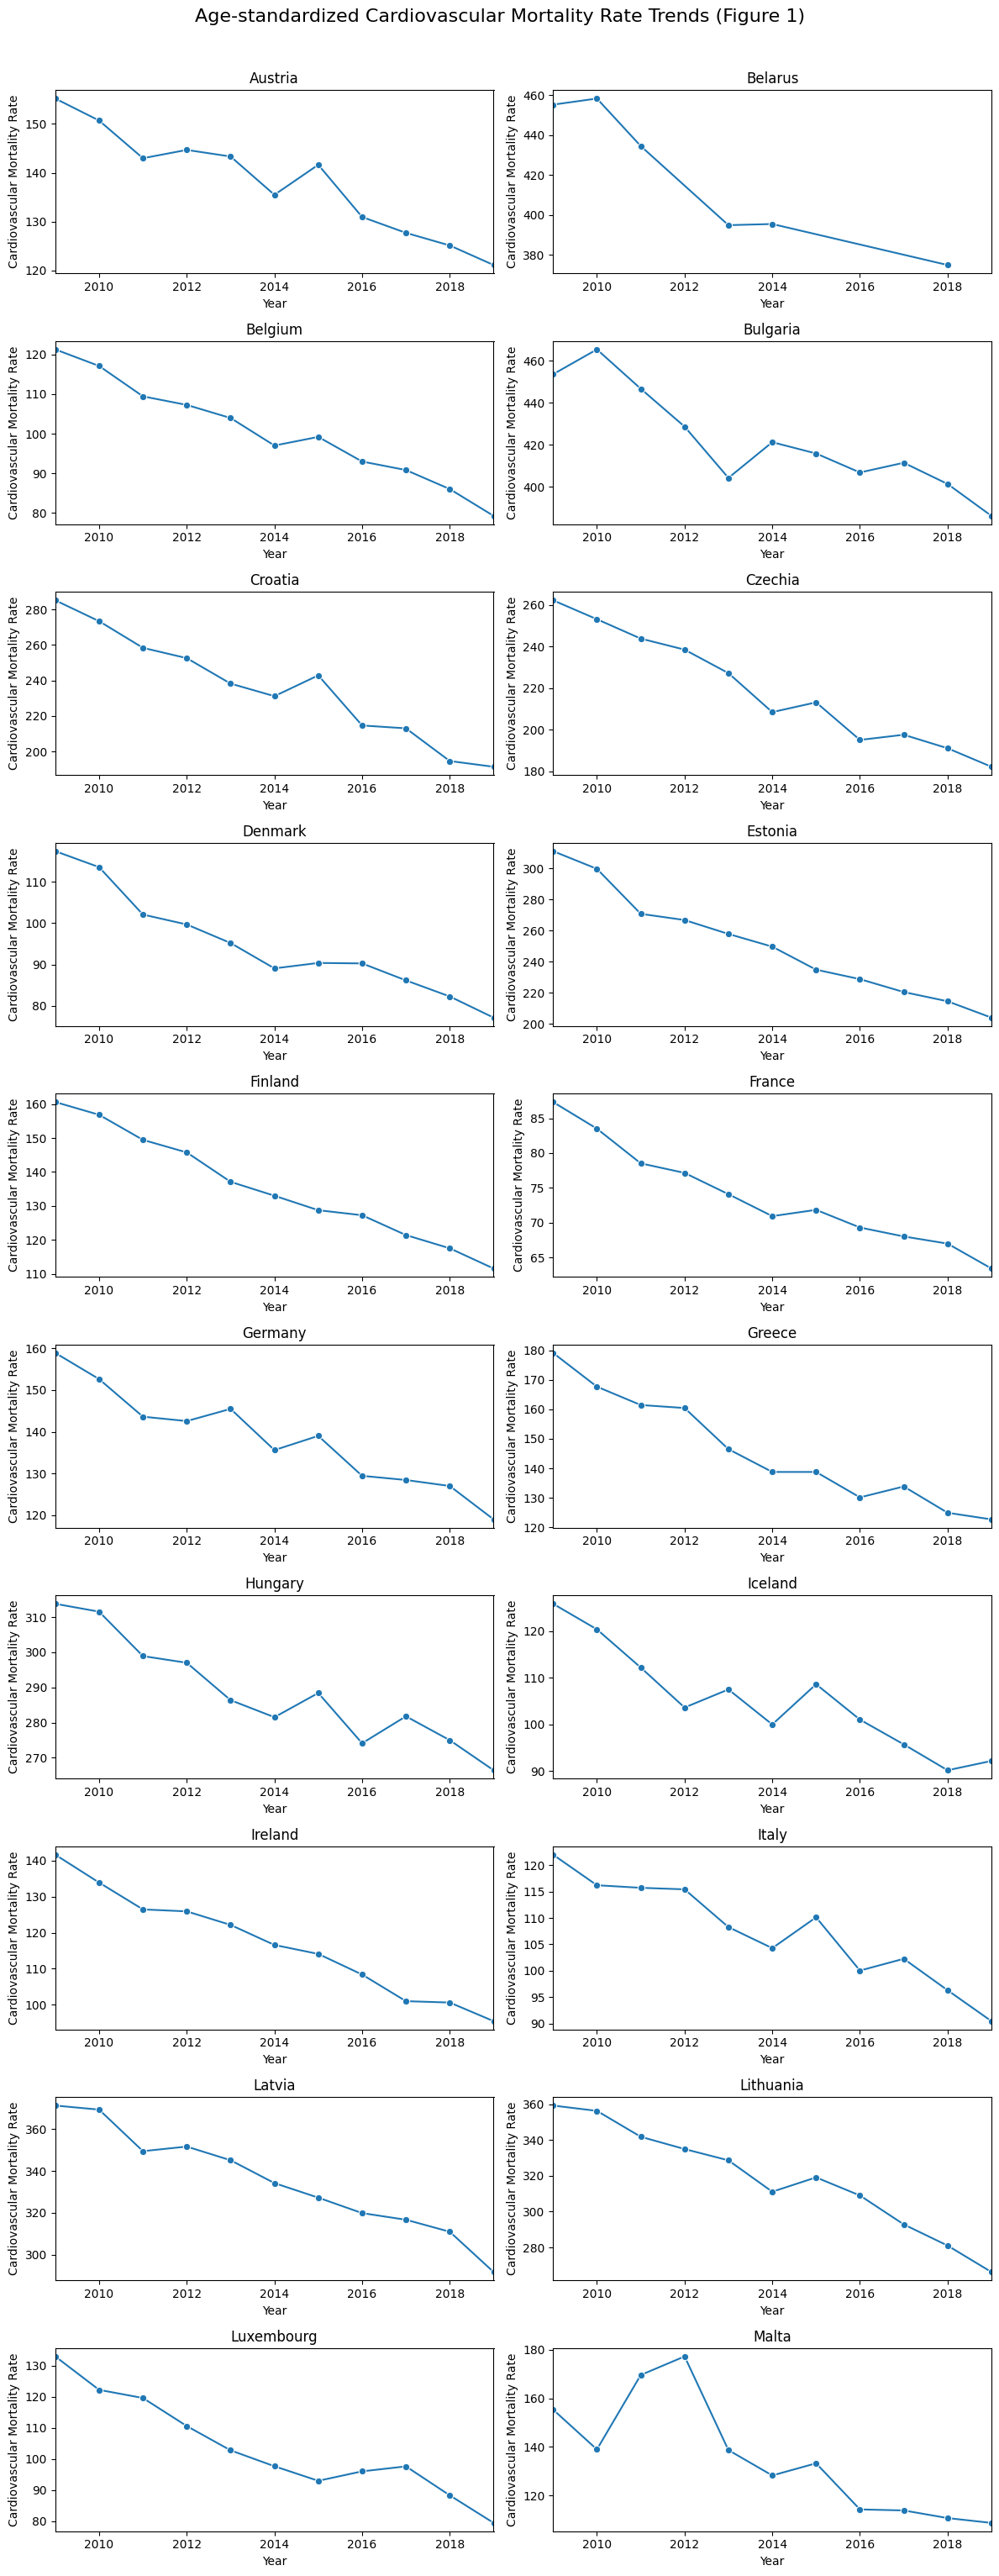

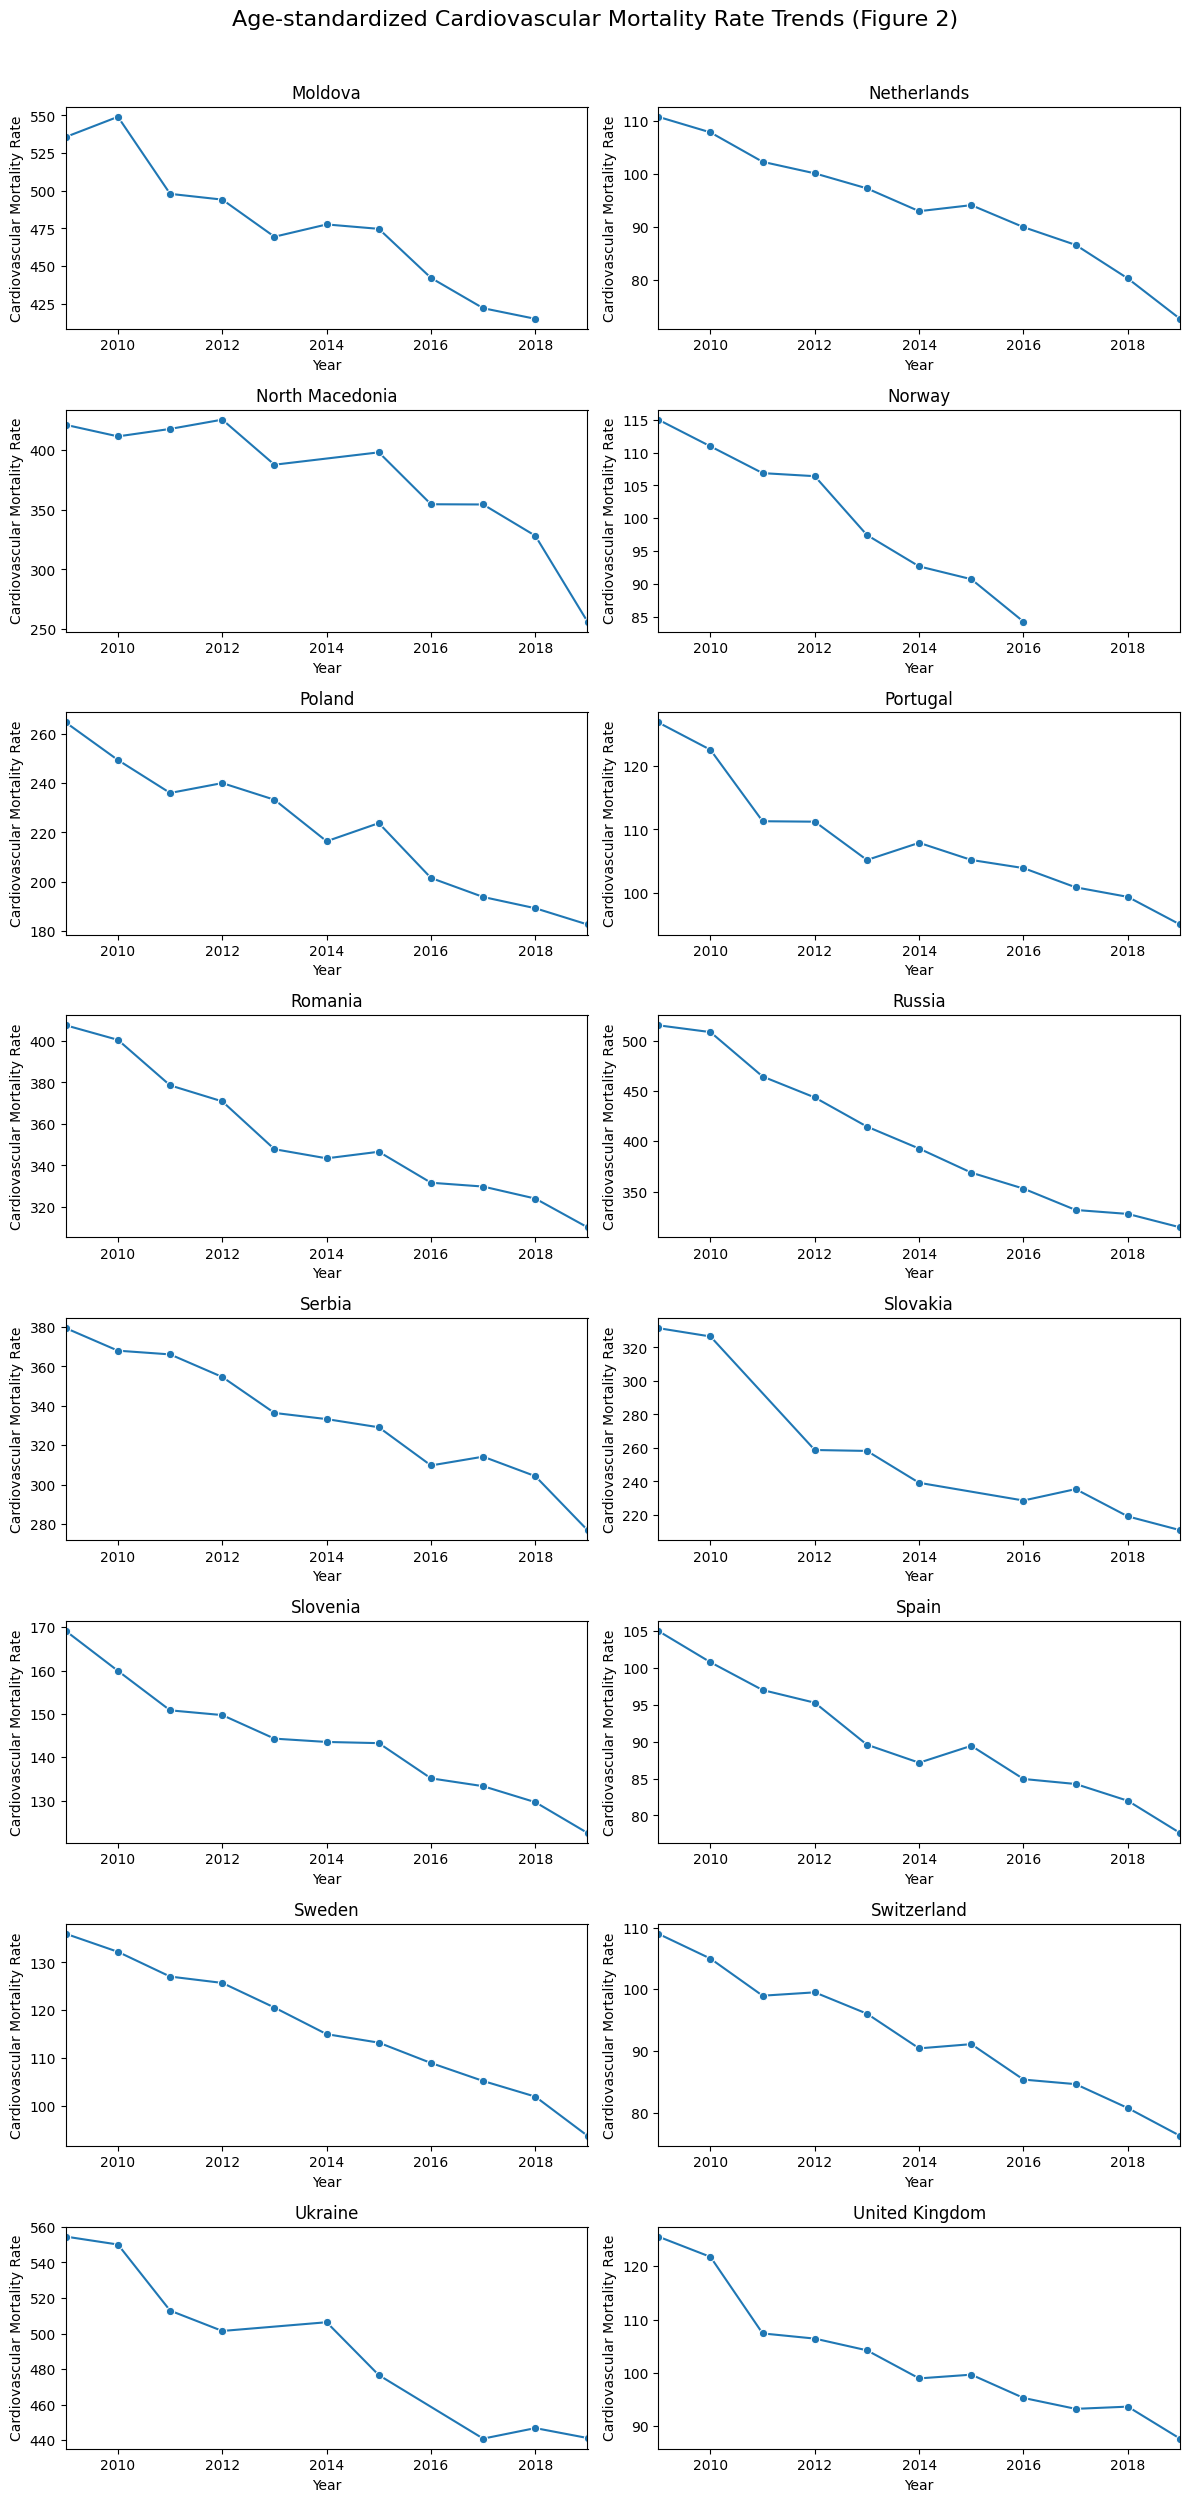

All figures have been saved in the 'cardio_mortality_rate_trends' directory.


In [27]:
output_dir = "cardio_mortality_rate_trends"
os.makedirs(output_dir, exist_ok=True)

# Split countries into chunks of 20 for multiple figures
chunks = [european_countries[i:i + 20] for i in range(0, len(european_countries), 20)]

# Loop through each chunk to create and save figures
for fig_index, chunk in enumerate(chunks):
    fig, axes = plt.subplots(10, 2, figsize=(12, 30))  # Create a 10x2 grid
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Loop through the countries in the current chunk
    for i, country in enumerate(chunk):
        tmp = cardio_df[cardio_df["Country"] == country]
        tmp = tmp.sort_values("Year")
        sns.lineplot(data=tmp, x="Year", y="Age-standardized cardiovascular mortality rate", ax=axes[i], marker="o")
        axes[i].set_title(country)
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel("Cardiovascular Mortality Rate")
        axes[i].set_xlim(2009, 2019)

    # Hide any unused subplots
    for j in range(len(chunk), len(axes)):
        fig.delaxes(axes[j])

    # Save the figure to the output directory
    plot_filename = os.path.join(output_dir, f"cardio_mortality_rate_trends_figure_{fig_index + 1}.png")
    plt.tight_layout()
    plt.suptitle(f"Age-standardized Cardiovascular Mortality Rate Trends (Figure {fig_index + 1})", y=1.02, fontsize=16)
    plt.savefig(plot_filename)
    plt.show()
    plt.close(fig)

print(f"All figures have been saved in the '{output_dir}' directory.")


#### Regression Models for Predicting the Cardiovascular Mortality Rate for Missing Years in the Cardiovascular Mortality Data

Predicted Age-standardized cardiovascular mortality rate for 2012 in Belarus: 416.11
Predicted Age-standardized cardiovascular mortality rate for 2015 in Belarus: 385.86
Predicted Age-standardized cardiovascular mortality rate for 2016 in Belarus: 379.83
Predicted Age-standardized cardiovascular mortality rate for 2017 in Belarus: 375.83
Predicted Age-standardized cardiovascular mortality rate for 2019 in Belarus: 373.90


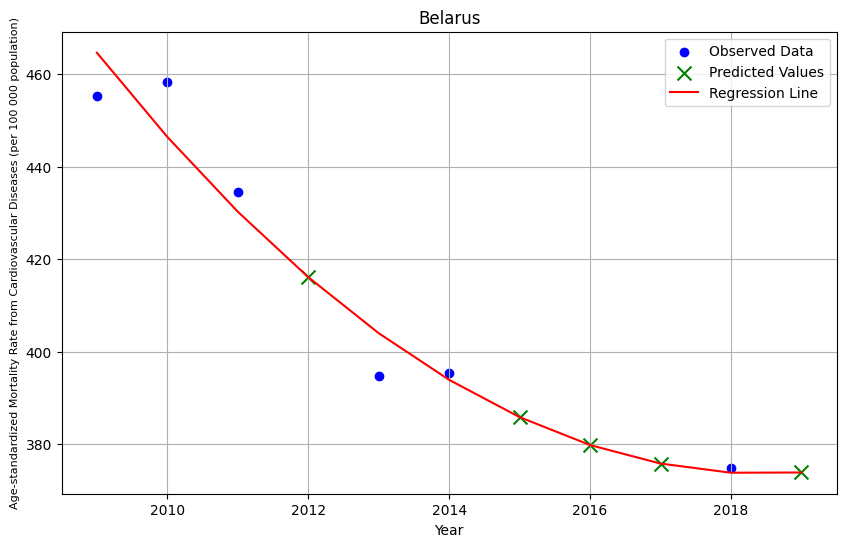

Predicted Age-standardized cardiovascular mortality rate for 2019 in Moldova: 402.00


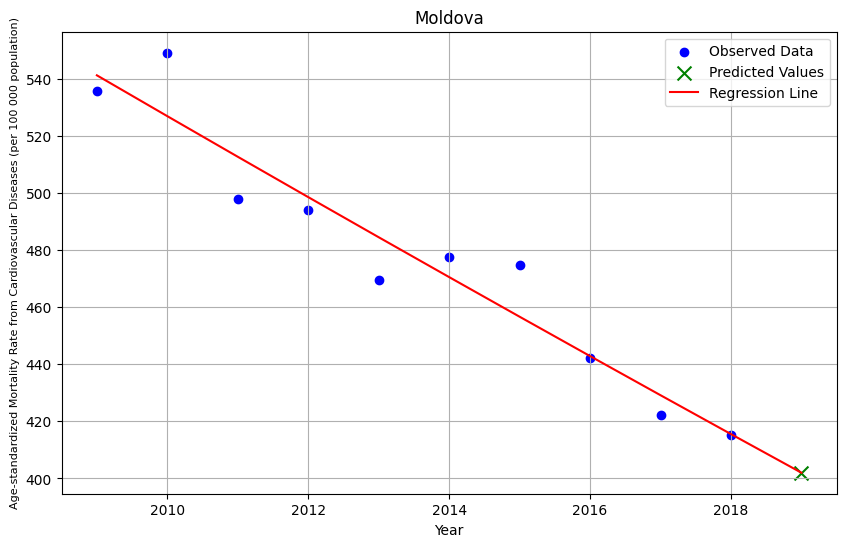

Predicted Age-standardized cardiovascular mortality rate for 2014 in North Macedonia: 400.26


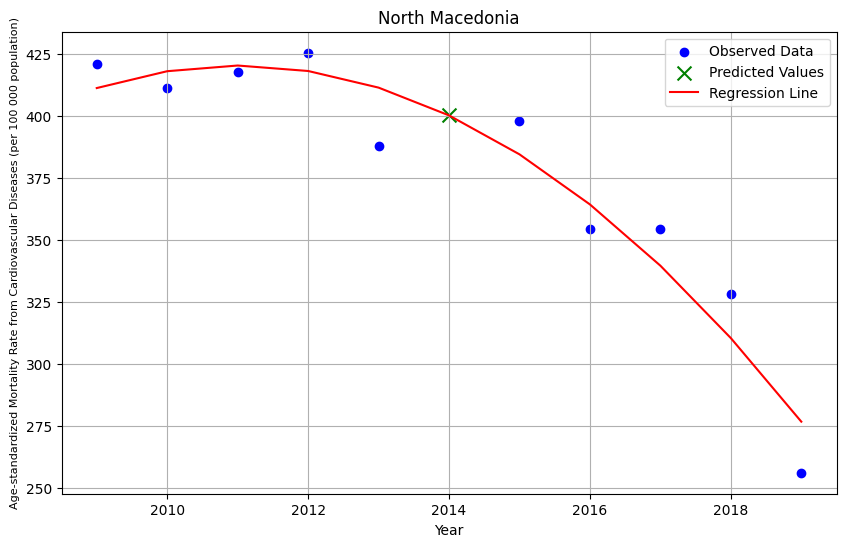

Predicted Age-standardized cardiovascular mortality rate for 2017 in Norway: 78.97
Predicted Age-standardized cardiovascular mortality rate for 2018 in Norway: 73.33
Predicted Age-standardized cardiovascular mortality rate for 2019 in Norway: 67.44


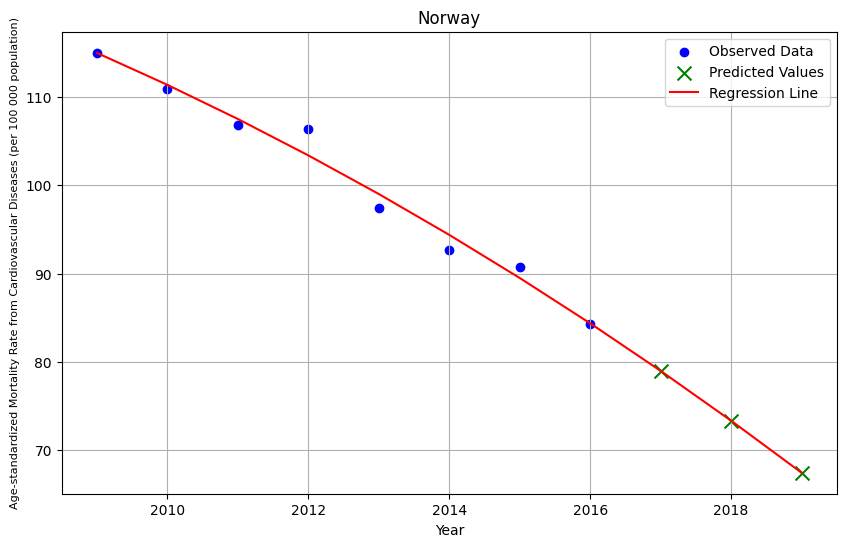

Predicted Age-standardized cardiovascular mortality rate for 2011 in Slovakia: 291.34
Predicted Age-standardized cardiovascular mortality rate for 2015 in Slovakia: 234.00


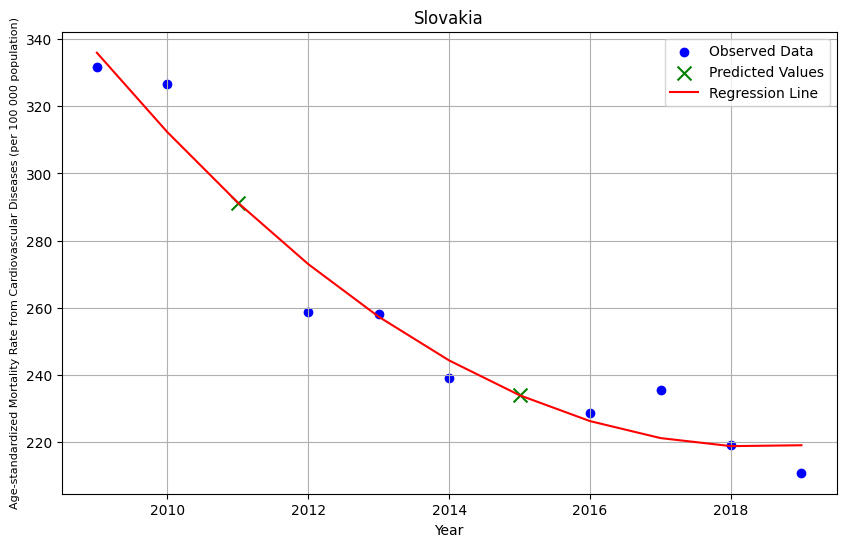

Predicted Age-standardized cardiovascular mortality rate for 2013 in Ukraine: 498.72
Predicted Age-standardized cardiovascular mortality rate for 2016 in Ukraine: 464.68


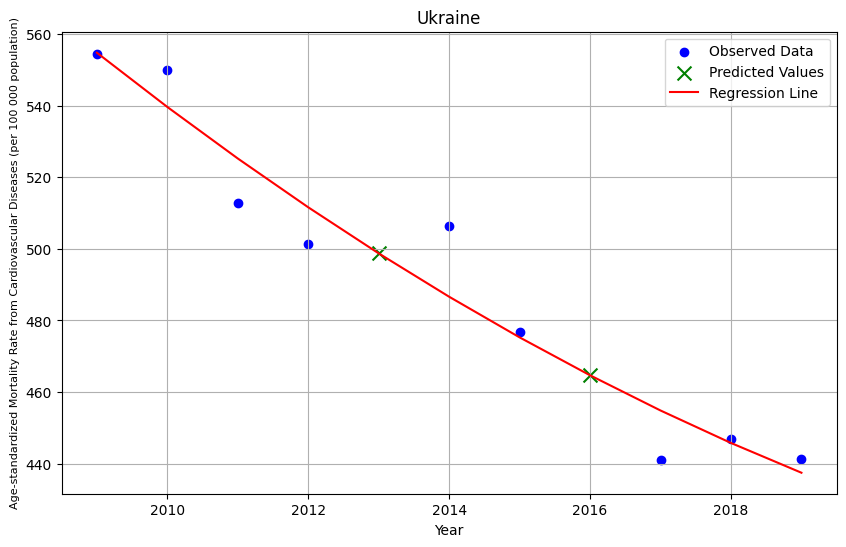

All plots have been saved in the 'regression_plots' Folder.


In [28]:
output_dir = "regression_plots"
os.makedirs(output_dir, exist_ok=True)
cardio_mortality_for_prediction = cardio_df[cardio_df["Year"].between(2000, 2019)].reset_index(drop=True)

# Loop through the countries with missing data for certain years
for country, missing in missing_pairs.items():
    pred_df = cardio_mortality_for_prediction[cardio_mortality_for_prediction["Country"] == country]
    pred_df = pred_df.sort_values("Year")

    # Independent variables - year / dependent variable - mortality rate
    X = pred_df["Year"].values.reshape(-1, 1)
    y = pred_df["Age-standardized cardiovascular mortality rate"].values

    # Fit the model
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(X, y)

    # Predict missing years
    missing_years = np.array(missing).reshape(-1, 1)
    predictions = model.predict(missing_years)

    # Print predictions
    for year, rate in zip(missing_years.flatten(), predictions):
        print(f"Predicted Age-standardized cardiovascular mortality rate for {year} in {country}: {rate:.2f}")

    # Combine observed and missing years for sorting
    all_years = np.concatenate([X, missing_years])
    sorted_indices = np.argsort(all_years.flatten())
    sorted_years = all_years[sorted_indices]
    sorted_predictions = model.predict(sorted_years)

    # Create and save the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a new figure for each country
    ax.scatter(X, y, color="blue", label="Observed Data")
    ax.scatter(missing_years, predictions, color="green", label="Predicted Values", marker="x", s=100)
    ax.plot(sorted_years, sorted_predictions, color="red", label="Regression Line")
    ax.set_title(f"{country}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Age-standardized Mortality Rate from Cardiovascular Diseases (per 100 000 population)", fontsize=8)
    ax.legend()
    ax.grid()

    # Save the plot
    plot_filename = os.path.join(output_dir, f"{country}_cardio_mortality_regression_plot.png")
    plt.savefig(plot_filename)
    plt.show()
    plt.close(fig)


print(f"All plots have been saved in the '{output_dir}' Folder.")


#### Filling In the Missing Rows (Years) in the Cardiovascular Mortality Data

In [29]:
for idx, (country, missing) in enumerate(missing_pairs.items()):
    # Filter data for the specific country
    pred_df = cardio_mortality_for_prediction[cardio_mortality_for_prediction["Country"] == country].sort_values("Year")

    # Extract country code
    country_code = pred_df["Country Code"].iloc[0]

    # Prepare data for regression
    X = pred_df["Year"].values.reshape(-1, 1)
    y1 = pred_df["Age-standardized cardiovascular mortality rate"].values

    # Fit regression models for rate
    model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    model.fit(X, y1)
    missing_years = np.array(missing).reshape(-1, 1)
    predictions_rate = model.predict(missing_years)

    new_rows = []
    for year, rate in zip(missing_years.flatten(), predictions_rate):
        # Check if the year already exists in the DataFrame
        if cardio_df[
            (cardio_df["Country"] == country) &
            (cardio_df["Year"] == year)
        ].empty:
            new_rows.append({
                "Country": country,
                "Country Code": country_code,
                "Year": year,
                "Age-standardized cardiovascular mortality rate": rate.round(8),
            })
            print(f"Added {country}, {year}")

    # Add the new row
    if new_rows:
        cardio_df = pd.concat([cardio_df, pd.DataFrame(new_rows)], ignore_index=True)

cardio_df.sort_values(by=["Country", "Year"], inplace=True)
cardio_df.to_csv("datasets/filled_cardio_mortality_df.csv")


Added Belarus, 2012
Added Belarus, 2015
Added Belarus, 2016
Added Belarus, 2017
Added Belarus, 2019
Added Moldova, 2019
Added North Macedonia, 2014
Added Norway, 2017
Added Norway, 2018
Added Norway, 2019
Added Slovakia, 2011
Added Slovakia, 2015
Added Ukraine, 2013
Added Ukraine, 2016


In [30]:
# Checking if all null values emerging upon merge have been taken into account
mortality_cardio_meat_df = pd.merge(meat_mortality_df, cardio_df, on=["Country", "Year", "Country Code"], how="outer")
print(f"How many null values emerge? {mortality_cardio_meat_df.isnull().values.sum()}\n")

How many null values emerge? 0



## Merged Dataframe Containing Meat Consumption, Mortality Rate and Cardiovascular Mortality Rate

In [31]:
mortality_cardio_meat_df

Country  Year    Poultry       Beef  Sheep and goat       Pork  \
0           Austria  2009  17.721516  17.410437        1.133936  55.312000   
1           Austria  2010  18.860003  17.500002        1.130000  67.600006   
2           Austria  2011  18.699999  17.399998        1.140000  65.519990   
3           Austria  2012  18.959995  17.379997        1.140000  48.389990   
4           Austria  2013  18.729996  17.169996        1.140000  52.609990   
..              ...   ...        ...        ...             ...        ...   
391  United Kingdom  2015  31.799995  18.689999        4.820000  25.649996   
392  United Kingdom  2016  33.590000  18.740000        4.580000  26.450000   
393  United Kingdom  2017  33.409996  18.639996        4.319999  25.699997   
394  United Kingdom  2018  34.489998  18.609999        4.219999  25.869999   
395  United Kingdom  2019  34.219997  17.189999        4.090000  25.549997   

     Other meats  Fish and seafood Country Code    Number  \
0       0.652264         13.828000          AUT   77381.0   
1       1.200000         13.610002          AUT   77199.0   
2       1.250000         14.319999          AUT   76479.0   
3       1.370000         13.789998          AUT   79436.0   
4       1.460000         13.879997          AUT   79526.0   
..           ...               ...          ...       ...   
391     1.510000         18.989998          GBR  602781.0   
392     1.500000         19.990000          GBR  597204.0   
393     1.160000         18.909996          GBR  606049.0   
394     0.880000         17.969997          GBR  614690.0   
395     1.020000         18.199999          GBR  603419.0   

     Age-standardized mortality rate  \
0                         428.954951   
1                         417.515519   
2                         404.269007   
3                         406.915355   
4                         399.561528   
..                               ...   
391                       409.000191   
392                       401.859503   
393                       397.945561   
394                       409.407446   
395                       385.317781   

     Age-standardized cardiovascular mortality rate  
0                                        155.208400  
1                                        150.697970  
2                                        142.984040  
3                                        144.682900  
4                                        143.334090  
..                                              ...  
391                                       99.686560  
392                                       95.324100  
393                                       93.274450  
394                                       93.689415  
395                                       87.690834  

[396 rows x 12 columns]

# 4. **Investigating Whether There Are More Trends in the Data**

#### Investigating Trends in the Meat Consumption Data

Based on the plots below, the meat consumption of most meat types seems to remain relatively static in almost all European countries.

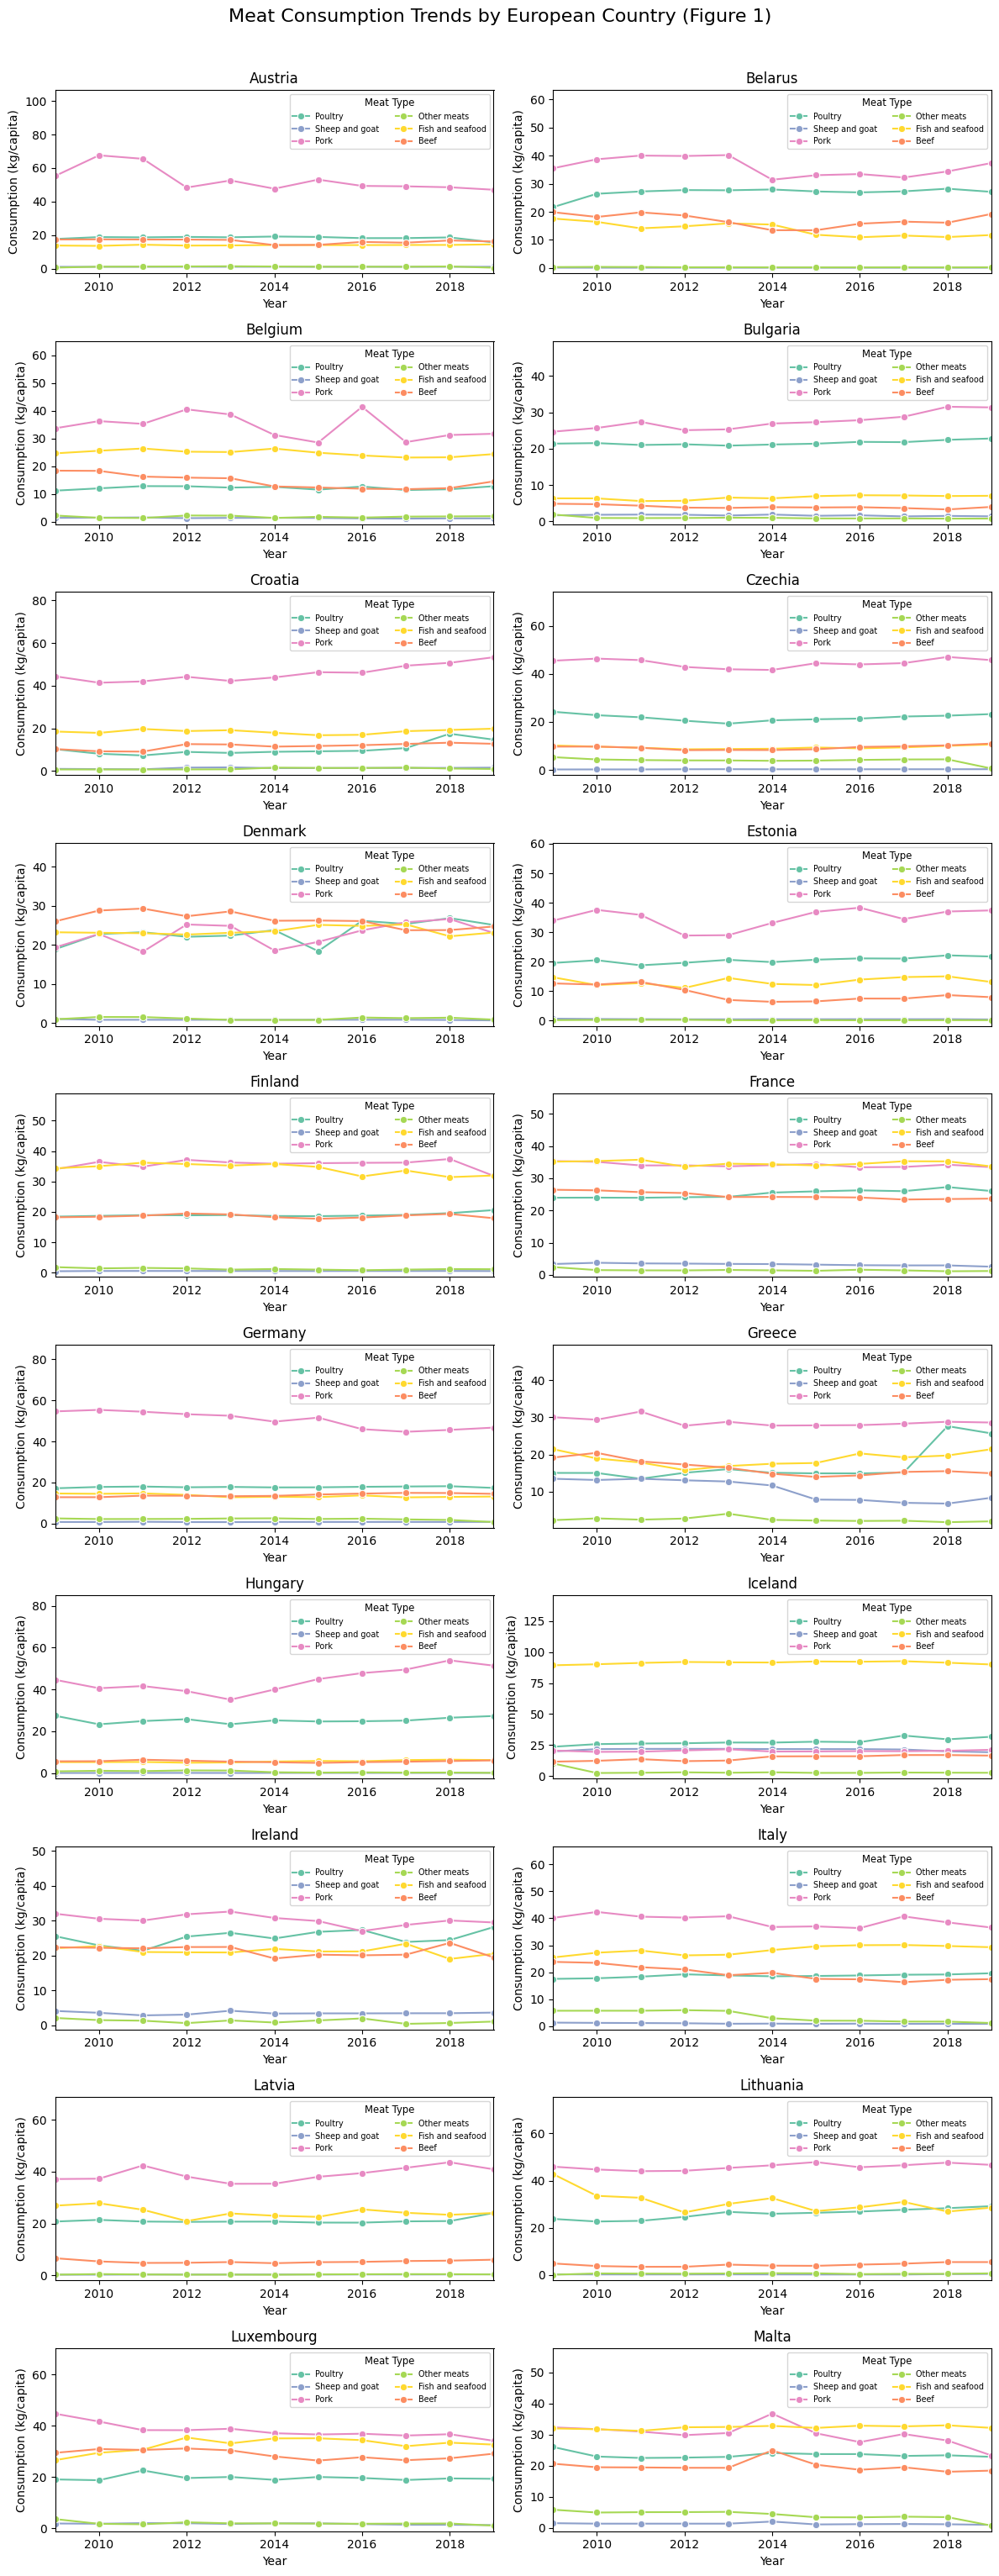

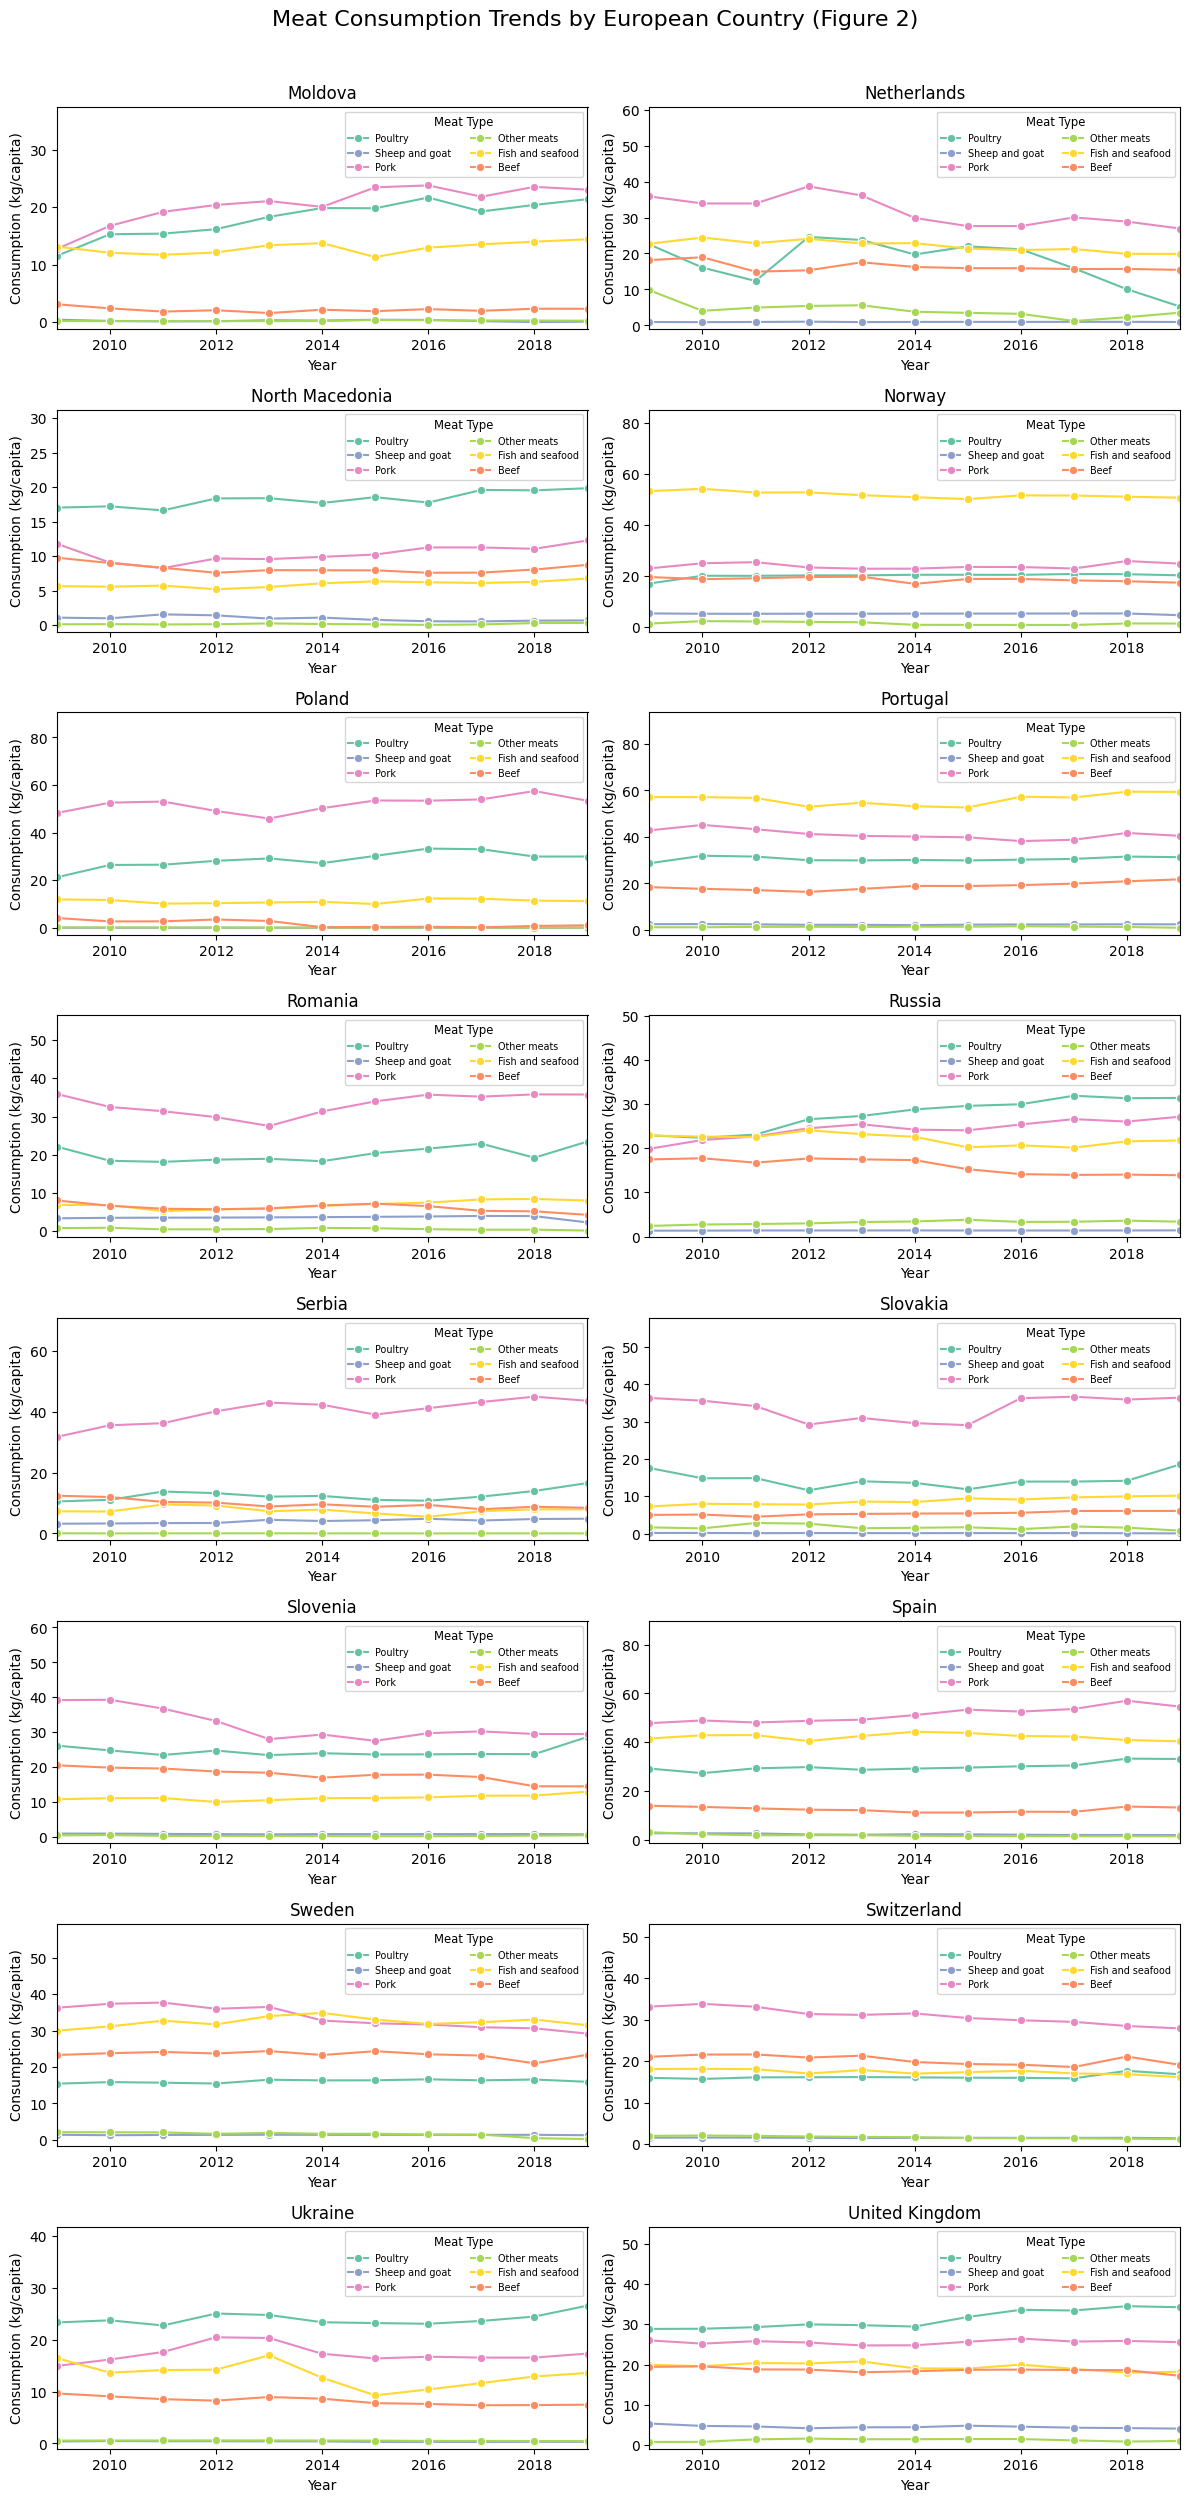

All figures have been saved in the 'meat_consumption_trends' directory.


In [32]:
output_dir = "meat_consumption_trends"
os.makedirs(output_dir, exist_ok=True)

# Split countries into chunks of 20 for multiple figures
chunks = [european_countries[i:i + 20] for i in range(0, len(european_countries), 20)]
long_meat_df = meat_df.melt(id_vars=["Country", "Year"],
                            var_name="Meat Type",
                            value_name="Consumption")

# For keeping coloring of meat types constant over different graphs
meat_types = long_meat_df["Meat Type"].unique()
set2_palette = sns.color_palette("Set2")
meat_colors = {meat_type: set2_palette[i] for i, meat_type in enumerate(meat_types)}

# Loop through each chunk to create and save figures
for fig_index, chunk in enumerate(chunks):
    fig, axes = plt.subplots(10, 2, figsize=(12, 30))  # Create a 10x2 grid
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Loop through the countries in the current chunk
    for i, country in enumerate(chunk):
        tmp = long_meat_df[long_meat_df["Country"] == country]
        tmp = tmp.sort_values("Year")
        sns.lineplot(data=tmp, x="Year", y="Consumption", hue="Meat Type",
                     ax=axes[i], marker="o", palette=meat_colors)
        axes[i].set_title(country)
        axes[i].set_xlabel("Year")
        axes[i].set_ylabel("Consumption (kg/capita)")
        axes[i].set_xlim(2009, 2019)
        y_min, y_max = axes[i].get_ylim()
        axes[i].set_ylim(y_min, y_max * 1.5)
        axes[i].legend(title="Meat Type", title_fontsize="small", fontsize="x-small", ncol=2, loc="upper right")

    # Hide any unused subplots
    for j in range(len(chunk), len(axes)):
        fig.delaxes(axes[j])

    # Save the figure to the output directory
    plot_filename = os.path.join(output_dir, f"meat_consumption_trends_figure_{fig_index + 1}.png")
    plt.tight_layout()
    plt.suptitle(f"Meat Consumption Trends by European Country (Figure {fig_index + 1})", y=1.02, fontsize=16)
    plt.savefig(plot_filename)
    plt.show()
    plt.close(fig)

print(f"All figures have been saved in the '{output_dir}' directory.")

# 5. **Data Aggregation, Visualization & Analysis**

## Plots Solely about Meat Consumption Data

#### Average Meat Consumption Across European Countries over 2009-2019

 There has been little variation in the meat consumption of meat types in European countries over the period 2009-2019.

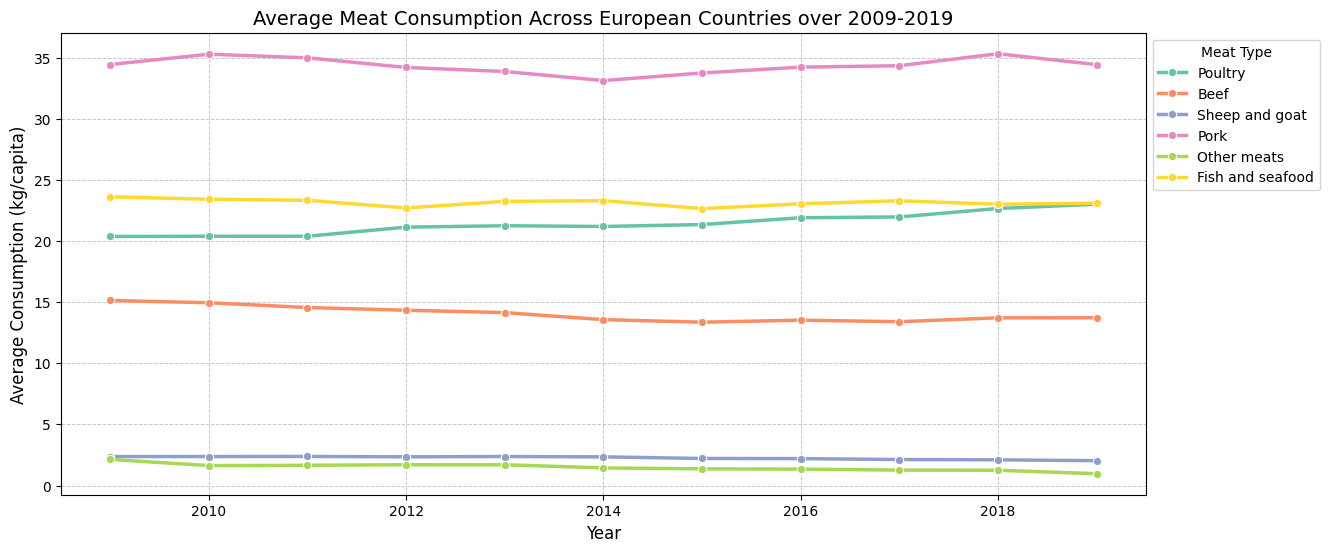

In [33]:
# Group by year and compute the mean across all European countries to get an outlook on Europe meat consumption trends
avg_eu_consumption_by_year = meat_df.groupby("Year").mean(True).reset_index()

# Transform the dataframe for plotting
long_avg_eu_consumption_by_year = avg_eu_consumption_by_year.melt(id_vars="Year",
                                                                  var_name="Meat Type",
                                                                  value_name="Consumption")

# Plot the data
plt.figure(figsize=(14, 6))
sns.lineplot(data=long_avg_eu_consumption_by_year, x="Year", y="Consumption", hue="Meat Type",
             palette=meat_colors, marker="o", linewidth=2.5)
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)
plt.ylabel("Average Consumption (kg/capita)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.legend(title="Meat Type", bbox_to_anchor=(1, 1), loc="upper left")
plt.title("Average Meat Consumption Across European Countries over 2009-2019", fontsize=14);

#### Top 5 Countries in Meat Consumption Across 2009-2019 by Meat Type

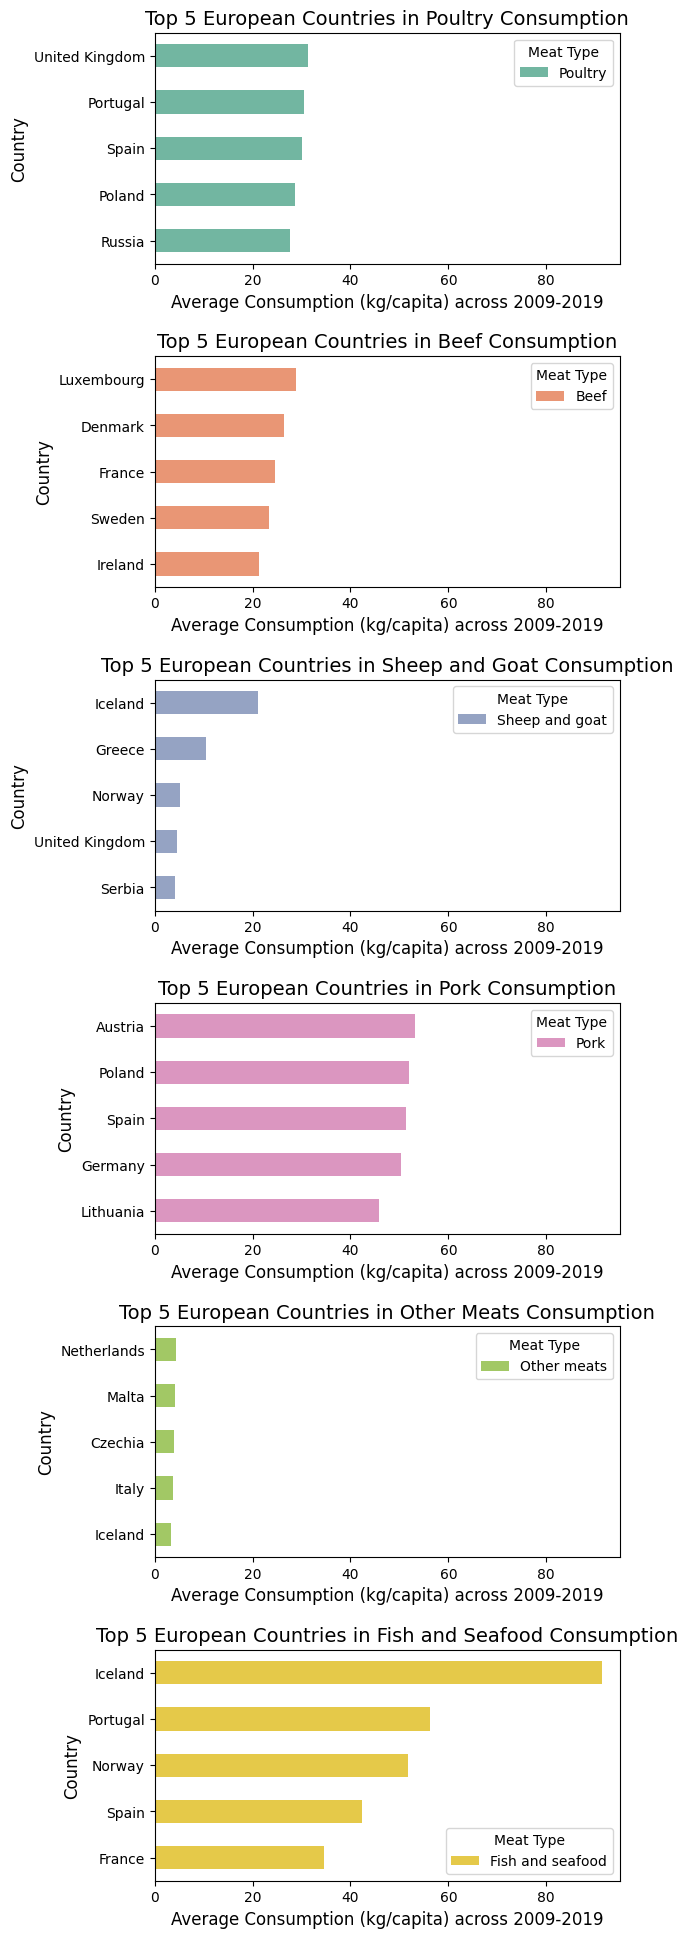

In [34]:
# Group by country and compute the mean cosumption by meat type over 2009-2019 for each country
avg_meat_by_country = meat_df.drop("Year", axis=1).groupby("Country").mean(True).reset_index()

# Transform the dataframe for plotting
long_avg_meat_by_country = avg_meat_by_country.melt(id_vars="Country",
                                                    var_name="Meat Type",
                                                    value_name="Consumption")

# Find the top 5 countries by consumption for each meat type
top_countries_per_meat = (
    long_avg_meat_by_country.groupby("Meat Type", group_keys=False)
    [["Country", "Meat Type", "Consumption"]].apply(lambda x: x.nlargest(5, "Consumption"))
)

# Create one subplot for each meat type
fig, axes = plt.subplots(len(meat_types), 1, figsize=(6, 4 * len(meat_types)))
title_meat_names = ["Poultry", "Beef", "Sheep and Goat", "Pork", "Other Meats", "Fish and Seafood"]

# Plot the top 5 countries by consumption for each meat type in a seperate subplot
for i, meat_type in enumerate(meat_types):
    ax = axes[i]
    data = top_countries_per_meat[top_countries_per_meat["Meat Type"] == meat_type]

    sns.barplot(data=data, x="Consumption", y="Country", hue="Meat Type", ax=ax,
                palette=meat_colors, width=0.5, dodge=False)
    ax.set_title(f"Top 5 European Countries in {title_meat_names[i]} Consumption", fontsize=14)
    ax.set_xlabel("Average Consumption (kg/capita) across 2009-2019", fontsize=12)
    ax.set_ylabel("Country", fontsize=12)
    ax.set_xlim(0, 95)

# Adjust the space between the subplots
plt.subplots_adjust(hspace=0.4);

#### Distribition of the Average Meat Consumption in Each European Country Across 2009-2019

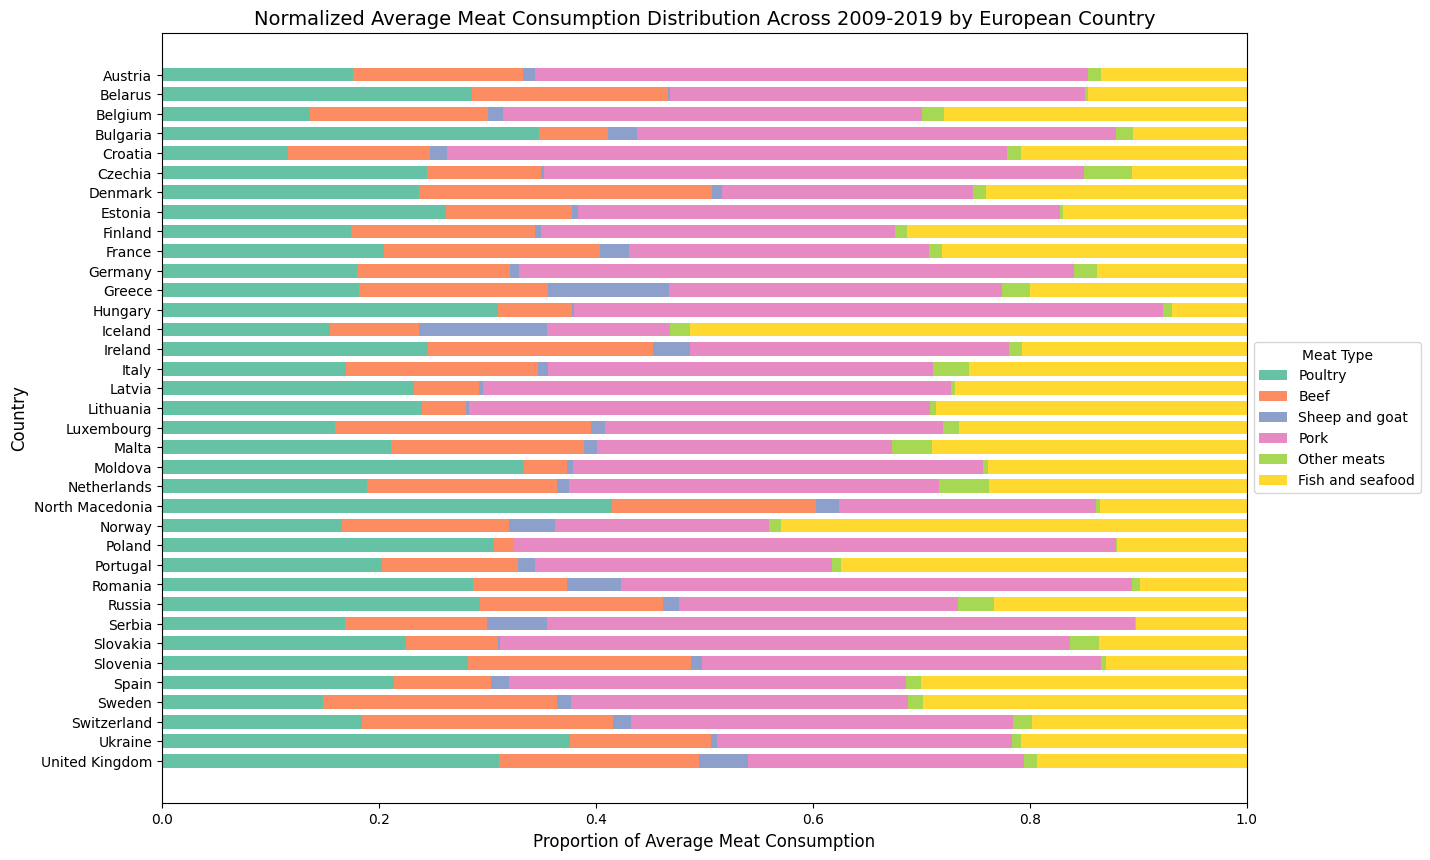

In [35]:
# Compute the consumption proportions for each meat type in each country over 2009-2019
normalized_avg_meat_by_country = avg_meat_by_country.copy()
normalized_avg_meat_by_country.iloc[:, 1:] = normalized_avg_meat_by_country.iloc[:, 1:].div(normalized_avg_meat_by_country.iloc[:, 1:].sum(axis=1), axis=0)

# Sort the countries alphabetically to aid in plot readability
normalized_avg_meat_by_country = normalized_avg_meat_by_country.set_index("Country")
normalized_avg_meat_by_country = normalized_avg_meat_by_country.sort_index(ascending=False)

# Adjust the size of the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Create an array for making the stacked bar plot
bottom_values = np.zeros(len(european_countries))

# Go over each meat type and stack the bars
for i, meat in enumerate(meat_types):
    ax.barh(normalized_avg_meat_by_country.index, normalized_avg_meat_by_country[meat], left=bottom_values, label=meat, color=meat_colors[meat], height=0.7)
    bottom_values += normalized_avg_meat_by_country[meat]

# Label the plot and adjust the x-axis
ax.set_title("Normalized Average Meat Consumption Distribution Across 2009-2019 by European Country", fontsize=14)
ax.set_xlabel("Proportion of Average Meat Consumption", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlim(0,1)
ax.legend(title="Meat Type", bbox_to_anchor=(1, 0.5), loc="center left");

## Plots Solely about Mortality Data

### Mean Proportion of Deaths by Sex Across 2009-2019 for Each European Country

There does not appear to be much difference between the mean proportion of men and women that die in different European countries across 2009-2019.

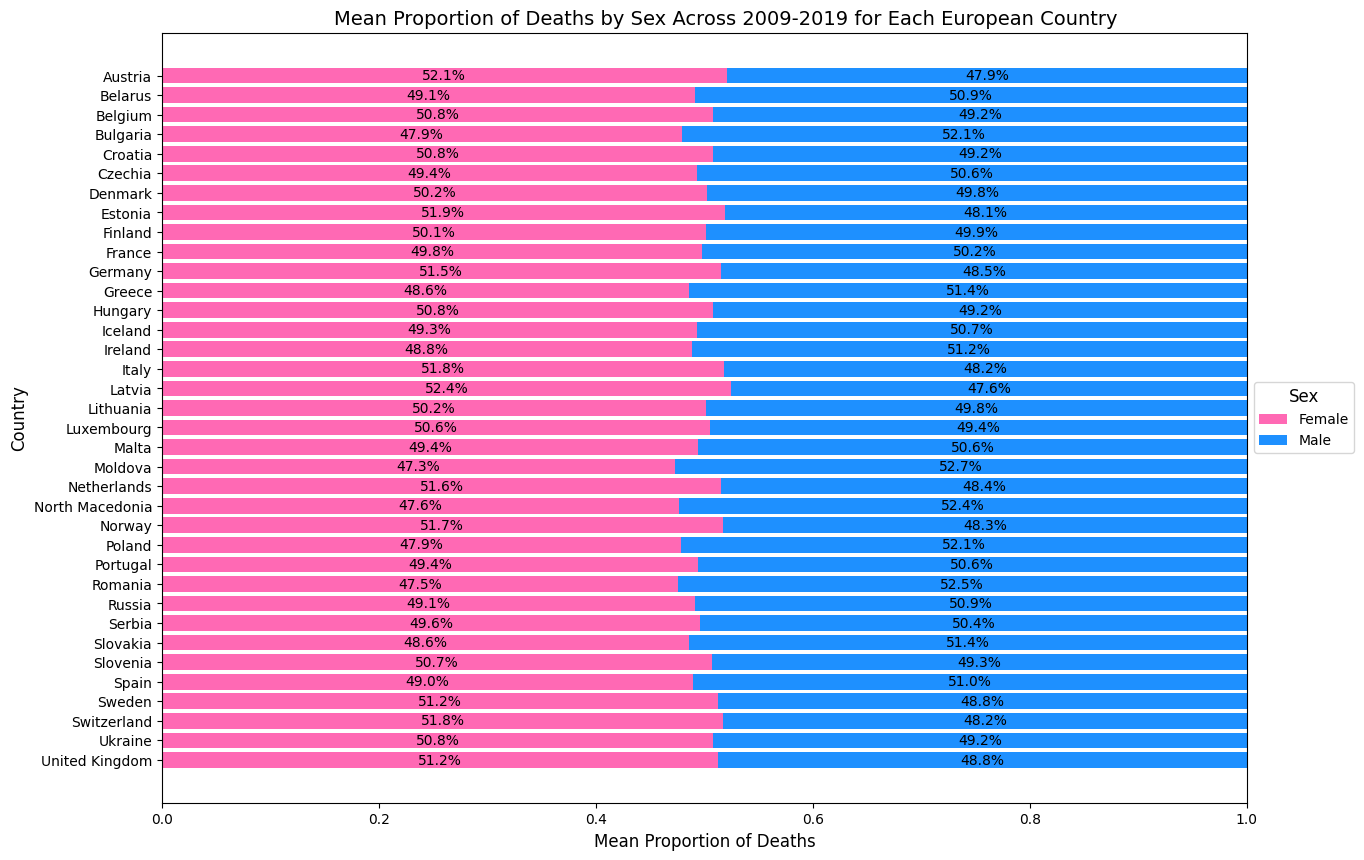

In [36]:
# Group by Country and Sex and sum the Number of deaths
male_female_by_country = mortality_df.groupby(["Country", "Sex"])["Number"].sum().unstack().drop(columns="All")
male_female_by_country = male_female_by_country.sort_index(ascending=False)

# Calculate the proportion of deaths that were Male and Female, respectively
male_female_by_country = male_female_by_country.div(male_female_by_country.sum(axis=1), axis=0)

# Adjust the size of the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Create a list of colors to ensure the same colors are used for each sex across different plots
colors = ["#FF69B4", "#1E90FF"]

# Create an array for making the stacked bar plot
bottom_values = np.zeros(len(european_countries))

# Go over each sex and stack the bars
for i, sex in enumerate(male_female_by_country.columns):
    bars = ax.barh(male_female_by_country.index, male_female_by_country[sex], left=bottom_values, color=colors[i])
    bottom_values += male_female_by_country[sex]

    # Put the percentage of deaths that were Male and Female, respectively, as a label on each bar
    for bar in bars:
        width = bar.get_width()
        percentage = width * 100
        label_x = bar.get_x() + width / 2
        label_y = bar.get_y() + bar.get_height() / 2
        ax.text(label_x, label_y, f"{percentage:.1f}%", va="center", ha="center", color="black", fontsize=10)

# Label the plot and adjust the x-axis and the legend
ax.set_title("Mean Proportion of Deaths by Sex Across 2009-2019 for Each European Country", fontsize=14, x=0.52)
ax.set_xlim(0,1)
ax.set_xlabel("Mean Proportion of Deaths", fontsize=12)
ax.set_ylabel("Country", fontsize=12)
ax.legend(title="Sex", labels=male_female_by_country.columns, loc="center left", title_fontsize=12,
          fontsize=10, bbox_to_anchor=(1, 0.5));

### Mean Proportion of Deaths by Sex Across European Countries in 2009-2019

There does not appear to be much difference between the proportion of men and women that die in different years across European countries.

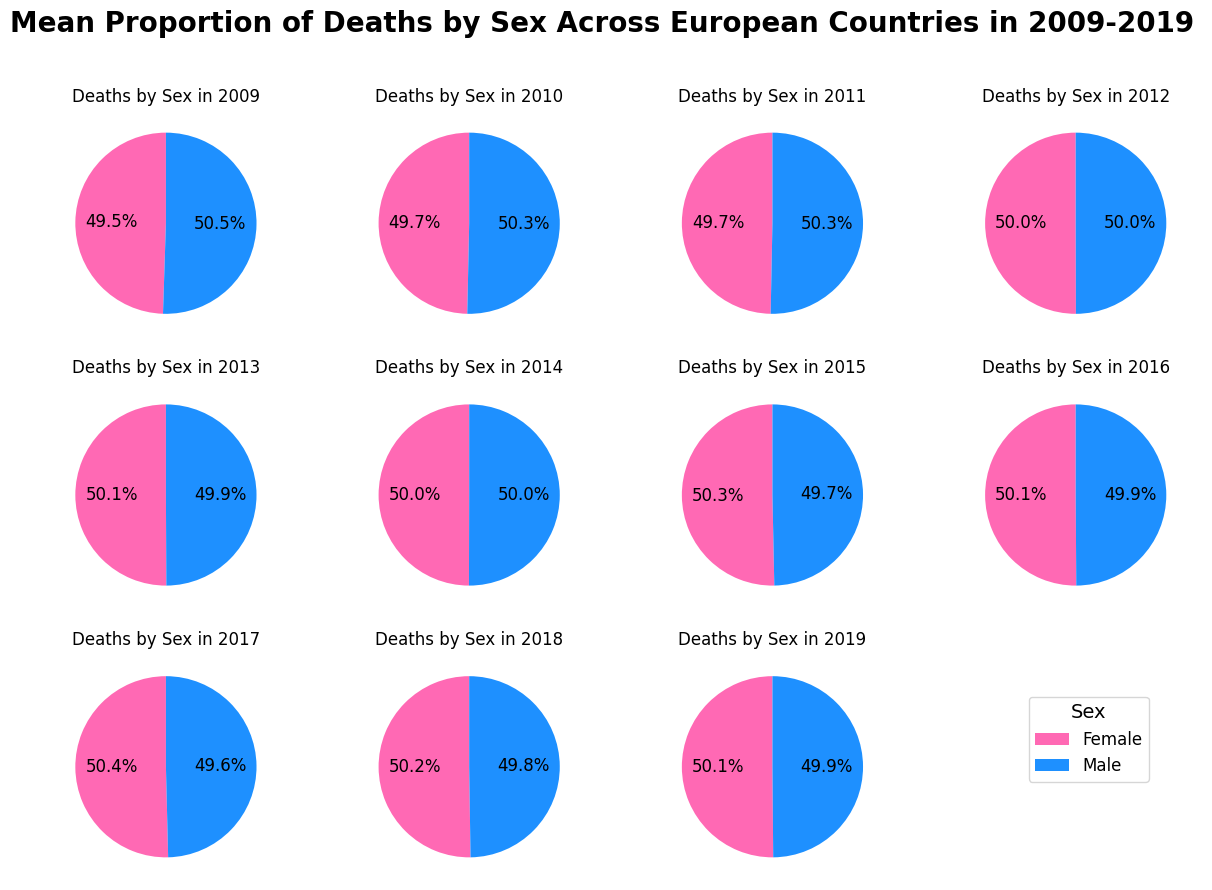

In [37]:
# Group by Year and Sex and sum the Number of deaths
male_female_by_year = mortality_df.groupby(["Year", "Sex"])["Number"].sum().unstack().drop(columns="All")

# Make a seperate subplot for each year
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Loop over the years and plot a pie chart with title for each
for i, year in enumerate(male_female_by_year.index):
    axes[i].pie(male_female_by_year.loc[year], autopct='%1.1f%%', startangle=90,
                colors=["#FF69B4", "#1E90FF"], textprops={'fontsize': 12}
    )
    axes[i].set_title(f"Deaths by Sex in {year}")

# Hide unused subplots
for j in range(len(male_female_by_year.index), len(axes)):
    axes[j].axis("off")

# Add overall title and legend to the plot
plt.suptitle("Mean Proportion of Deaths by Sex Across European Countries in 2009-2019", fontsize=20, fontweight='bold')
fig.legend(title="Sex", labels=male_female_by_year.columns, loc="lower right", title_fontsize=14, fontsize=12, bbox_to_anchor=(0.87, 0.2));

### Choroleth Map Representing the Mean Age-standardized Mortality Rate of European Countries Across 2009-2019

In [38]:
# Get the map with countries
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
response = requests.get(url)
zip_content = io.BytesIO(response.content)

# Extract to a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    with zipfile.ZipFile(zip_content, "r") as zip_ref:
        zip_ref.extractall(temp_dir)
    shp_path = os.path.join(temp_dir, "ne_110m_admin_0_countries.shp")
    world = gpd.read_file(shp_path)

# Filter for Europe
europe = world[world["CONTINENT"] == "Europe"]
df = mortality_df.copy()
df["Country"] = df["Country"].str.strip()

# Get only the numeric columns from the mortality dataframe
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols = numeric_cols.drop(["Year"])

# Group by country and take the mean of the numeric columns
df_grouped = df.groupby("Country", as_index=False)[numeric_cols].mean()

# Merge on 'NAME' from the shapefile with 'Country' from df_grouped
europe = europe.merge(df_grouped, left_on="NAME", right_on="Country", how="left")

# Convert to WGS84 for Folium and then to GeoJSON
europe = europe.to_crs(epsg=4326)
europe_geojson = europe.to_json()

# Create a Folium map and add a Choropleth layer signifying the Age-standardized mortality rate
map_europe = folium.Map(location=[54, 15], zoom_start=4, tiles="cartodb positron")

folium.Choropleth(
    geo_data=europe_geojson,
    data=europe,
    columns=["NAME", "Age-standardized mortality rate"],
    key_on="feature.properties.NAME",
    fill_color="Blues",
    nan_fill_color="white",
    legend_name="Age-standardized Mortality Rate (per 100 000 population)",
).add_to(map_europe)

folium.LayerControl().add_to(map_europe)
map_europe

### Top 10 European Countries by Mean Age-standardized Mortality Rate Across 2009-2019

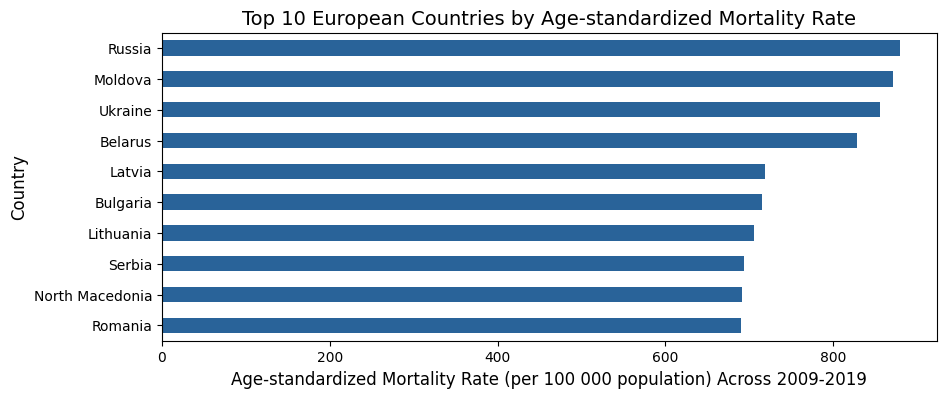

In [39]:
# Drop the columns Year and Number, group by country, and compute the mean of the Age-standardized mortality rate across 2009-2019
avg_mrate_by_country = mortality_df.drop(["Year", "Number"], axis=1).groupby("Country")["Age-standardized mortality rate"].mean().reset_index()

# Sort the countries by mortality rate and select the top 10 countries
avg_mrate_by_country = avg_mrate_by_country.sort_values("Age-standardized mortality rate", ascending=False)
top_countries_mrate = avg_mrate_by_country.head(10)

# Make a horizontal barplot with the top 10 countries
plt.figure(figsize=(10, 4))
sns.barplot(data=top_countries_mrate, x="Age-standardized mortality rate", y="Country", width=0.5, dodge=False, color=plt.cm.Blues(0.8))
plt.title("Top 10 European Countries by Age-standardized Mortality Rate", fontsize=14)
plt.xlabel("Age-standardized Mortality Rate (per 100 000 population) Across 2009-2019", fontsize=12)
plt.ylabel("Country", fontsize=12);

## Plots Solely about Cardiovascular Mortality Data

### Choroleth Map Representing the Mean Age-standardized Mortality Rate from Cardiovascular Diseases of European Countries Across 2009-2019

In [40]:
# Get the map with countries
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
response = requests.get(url)
zip_content = io.BytesIO(response.content)

# Extract to a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    with zipfile.ZipFile(zip_content, "r") as zip_ref:
        zip_ref.extractall(temp_dir)
    shp_path = os.path.join(temp_dir, "ne_110m_admin_0_countries.shp")
    world = gpd.read_file(shp_path)

# Filter for Europe
europe = world[world["CONTINENT"] == "Europe"]
df = cardio_df.copy()
df["Country"] = df["Country"].str.strip()

# Get only the numeric columns from the mortality dataframe
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols = numeric_cols.drop(["Year"], errors="ignore")

# Group by country and take the mean of the numeric columns
df_grouped = df.groupby("Country", as_index=False)[numeric_cols].mean()

# Merge on 'NAME' from the shapefile with 'Country' from df_grouped
europe = europe.merge(df_grouped, left_on="NAME", right_on="Country", how="left")

# Convert to WGS84 for Folium and then to GeoJSON
europe = europe.to_crs(epsg=4326)
europe_geojson = europe.to_json()

# Create a Folium map and add a Choropleth layer signifying the Age-standardized mortality rate from cardiovascular diseases
map_europe = folium.Map(location=[54, 15], zoom_start=4, tiles="cartodb positron")

folium.Choropleth(
    geo_data=europe_geojson,
    data=europe,
    columns=["NAME", "Age-standardized cardiovascular mortality rate"],
    key_on="feature.properties.NAME",
    fill_color="Reds",
    nan_fill_color="white",
    legend_name="Age-standardized Cardiovascular Mortality Rate",
).add_to(map_europe)

folium.LayerControl().add_to(map_europe)
map_europe

### Top 10 European Countries by Mean Age-standardized Mortality Rate Across 2009-2019

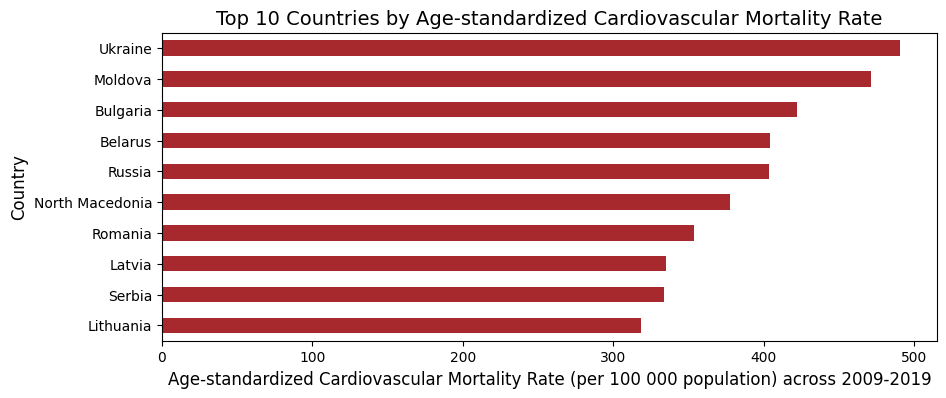

In [41]:
# Drop the columns Year and Number, group by country, and compute the mean of the Age-standardized mortality rate from cardiovascular across 2009-2019
avg_cmrate_by_country = cardio_df.drop(["Year"], axis=1).groupby("Country")["Age-standardized cardiovascular mortality rate"].mean().reset_index()

# Sort the countries by cardiovascular mortality rate and select the top 10 countries
avg_cmrate_by_country = avg_cmrate_by_country.sort_values("Age-standardized cardiovascular mortality rate", ascending=False)
top_countries_cmrate = avg_cmrate_by_country.head(10)

# Make a horizontal barplot with the top 10 countries
plt.figure(figsize=(10, 4))
sns.barplot(data=top_countries_cmrate, x="Age-standardized cardiovascular mortality rate", y="Country", width=0.5, dodge=False, color=plt.cm.Reds(0.8))
plt.title("Top 10 Countries by Age-standardized Cardiovascular Mortality Rate", fontsize=14)
plt.xlabel("Age-standardized Cardiovascular Mortality Rate (per 100 000 population) across 2009-2019", fontsize=12)
plt.ylabel("Country", fontsize=12);

## Combined Plots & Analysis

### Normality  Check

Due to the trend found in the mortality rate and the cardiovascular mortality rate, we decided to detrend these data by using residuals from the trend line (linear regression line).

Normality check is done based on "detrended mortality rate" and "detrended cardiovascular mortality rate", and these detrended data is used for further analysis.

Meat consumption rates across all types and countries seem to be stationary. There is no trend detected; therefore, we just use raw data for the normality check and analysis.

#### Normality Check Pipeline
- Shapiro-Wilk test
- QQ plot

If the Shapiro-Wilk test shows statistical significance, then the data is not normally distributed.

If QQ-plot does not shows relatively straight line, then the data is not normally distributed.

Detrended Mortality Normality: Shapiro-Wilk p-value = 2.86e-17
Detrended Cardiovascular Motartality Normality: Shapiro-Wilk p-value = 5.20e-18
Poultry Consumption Normality: Shapiro-Wilk p-value = 1.18e-01
Beef Consumption Normality: Shapiro-Wilk p-value = 1.07e-06
Sheep and goat Consumption Normality: Shapiro-Wilk p-value = 1.59e-31
Pork Consumption Normality: Shapiro-Wilk p-value = 2.71e-01
Other meats Consumption Normality: Shapiro-Wilk p-value = 1.27e-20
Fish and seafood Consumption Normality: Shapiro-Wilk p-value = 2.08e-21


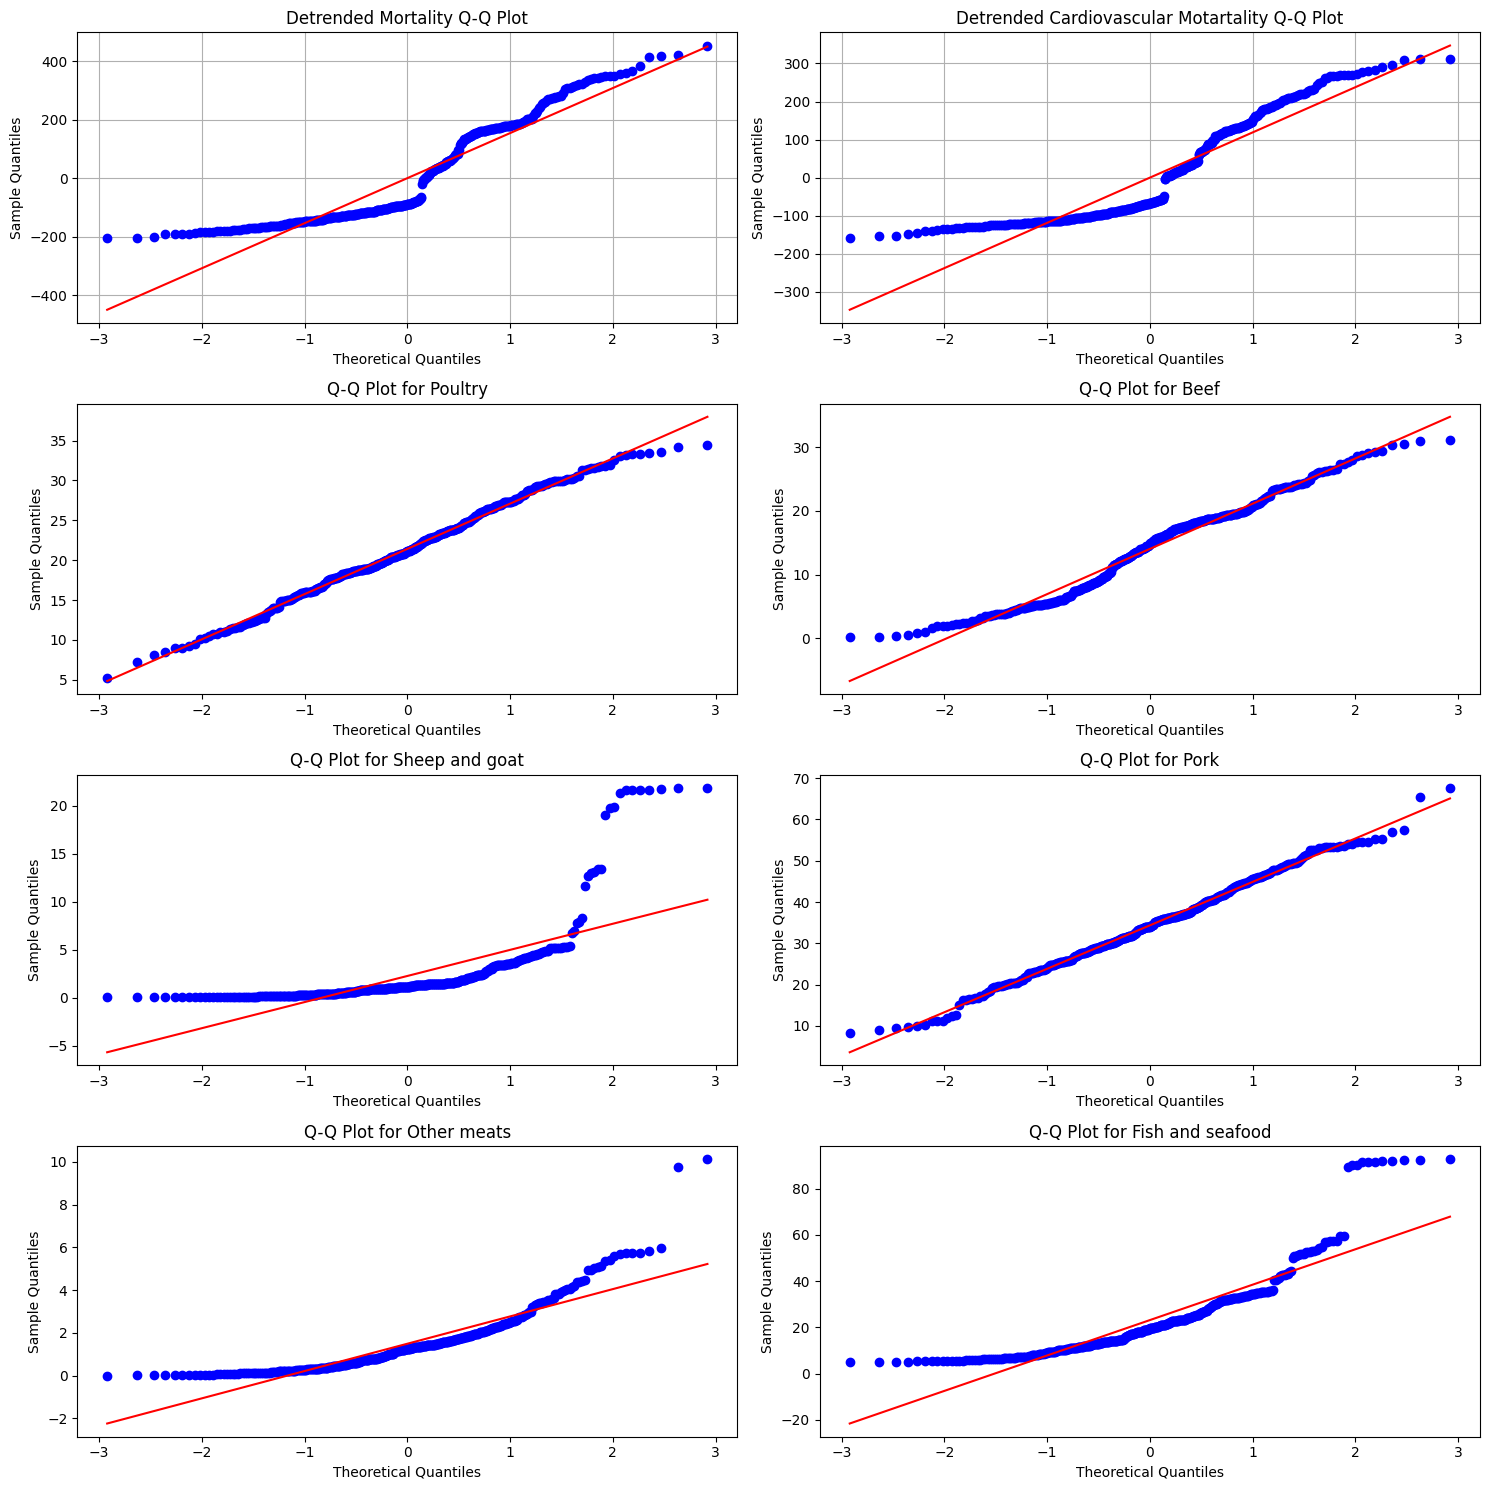

In [42]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.ravel()

# Find trend line for mortality rate
slope, intercept, _, _, _ = linregress(mortality_cardio_meat_df['Year'], mortality_cardio_meat_df['Age-standardized mortality rate'])
mortality_cardio_meat_df['Trend'] = slope * mortality_cardio_meat_df['Year'] + intercept
mortality_cardio_meat_df['Detrended Mortality'] = mortality_cardio_meat_df['Age-standardized mortality rate'] - mortality_cardio_meat_df['Trend']

# Find trend line for cardiovascular mortality rate
slope, intercept, _, _, _ = linregress(mortality_cardio_meat_df['Year'], mortality_cardio_meat_df['Age-standardized cardiovascular mortality rate'])
mortality_cardio_meat_df['Trend2'] = slope * mortality_cardio_meat_df['Year'] + intercept
mortality_cardio_meat_df['Detrended Cardio'] = mortality_cardio_meat_df['Age-standardized cardiovascular mortality rate'] - mortality_cardio_meat_df['Trend2']

# Normality check on detrended mortality rate
stat_det, p_det = shapiro(mortality_cardio_meat_df['Detrended Mortality'])
print(f"Detrended Mortality Normality: Shapiro-Wilk p-value = {p_det:.2e}")
probplot(mortality_cardio_meat_df["Detrended Mortality"], dist="norm", plot=axes[0])
axes[0].set_title("Detrended Mortality Q-Q Plot")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Sample Quantiles")
axes[0].grid()

# Normality Check on detrended cardiovascular mortality rate
stat_det2, p_det2 = shapiro(mortality_cardio_meat_df['Detrended Cardio'])
print(f"Detrended Cardiovascular Motartality Normality: Shapiro-Wilk p-value = {p_det2:.2e}")
probplot(mortality_cardio_meat_df["Detrended Cardio"], dist="norm", plot=axes[1])
axes[1].set_title("Detrended Cardiovascular Motartality Q-Q Plot")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].grid()


# Normality check on Meat types
for i, meat_type in enumerate(meat_mortality_df.columns[2:8]):
  stat_meat, p_meat = shapiro(mortality_cardio_meat_df[meat_type])
  print(f"{meat_type} Consumption Normality: Shapiro-Wilk p-value = {p_meat:.2e}")

  probplot(mortality_cardio_meat_df[meat_type], dist="norm", plot=axes[i+2])
  axes[i+2].set_title(f"Q-Q Plot for {meat_type}")
  axes[i+2].set_xlabel("Theoretical Quantiles")
  axes[i+2].set_ylabel("Sample Quantiles")
  plt.grid()

plt.tight_layout()
plt.show()

The results show Poultry and Pork are normally distributed. The Shapiro-Wilk shows no statistical significance, and the line is relatively straight on the QQ-plot. The rest of the data does not appear to be normally distributed based on both the Shapiro-Wilk tests and the QQ-plots.

### Correlation Analysis

In this cell, we run the correlation test based on the normality to see if we can observe correlation between different meat type consumption and detrended mortality rate and correlation between different meat type consumption and detrended cardiovascular mortality rate.

#### Test Selection
- Pearson if both data is normally distributed
- Spearman if normality is not found in one of data

Since most data is not normally distributed, the correlation coefficient is computed based on Spearman.

The plots contain a correlation score, p-value and significance. The significance has several levels: no, * (if p-value is < 0.1), ** (if p-value is < 0.05) and *** (if p-value is less than 0.01).

First, we run the correlation analysis between detrended mortality rate and different meat type consumption.
Then we run the correlation analysis between detrended cardiovascular mortality rate and different meat type consumption.

### Correlation Plots Between Detrended Age-standardized Mortality Rate and Different Meat Type Consumption

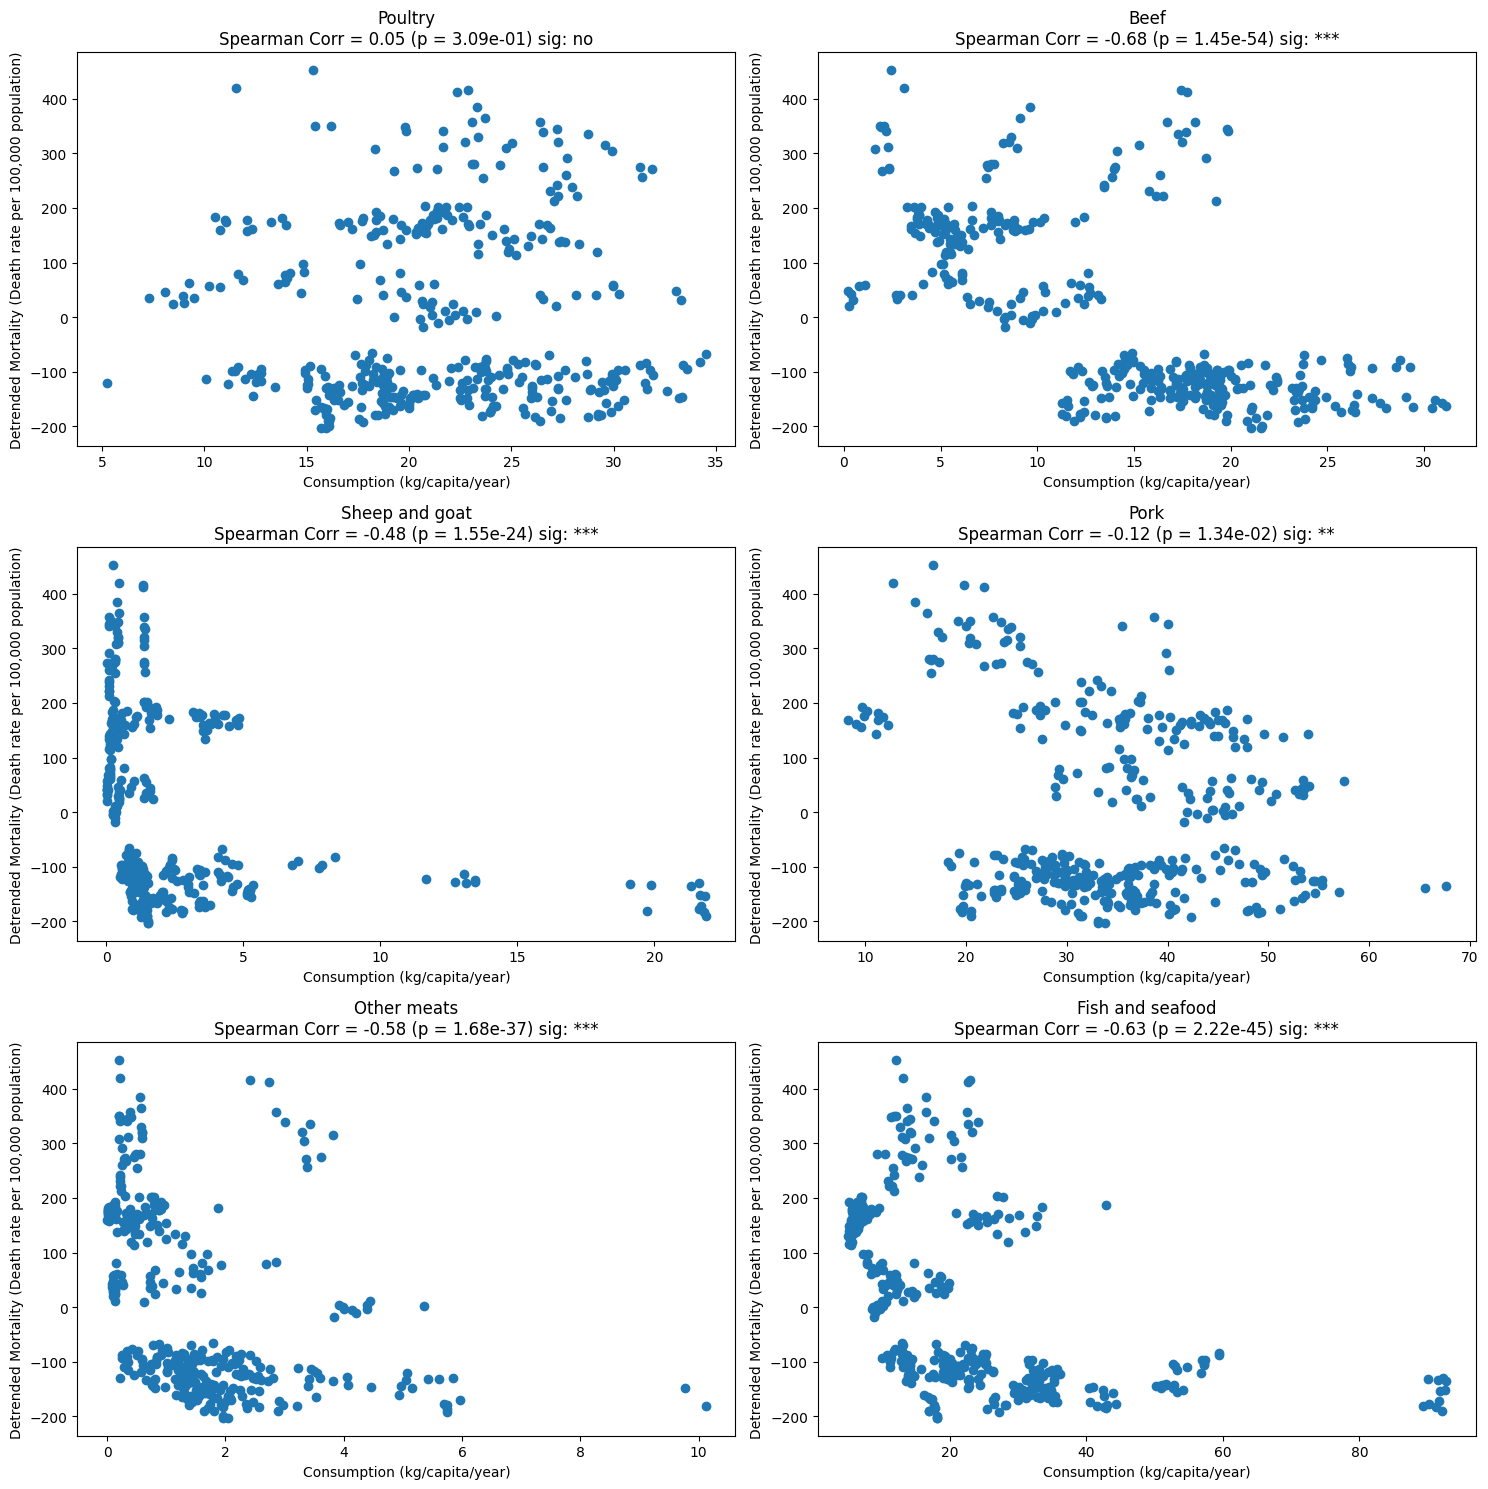

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()
for i, meat_type in enumerate(meat_mortality_df.columns[2:8]):
  # Test normality on detrended mortality rate
  stat_det, p_det = shapiro(mortality_cardio_meat_df['Detrended Mortality'])
  stat_meat, p_meat = shapiro(mortality_cardio_meat_df[meat_type])

  # Correlation analysis with detrended data
  if p_det > 0.05 and p_meat > 0.05:
      # Pearson correlation on detrended data
      corr, p_corr = pearsonr(mortality_cardio_meat_df['Detrended Mortality'], mortality_cardio_meat_df[meat_type])
      method = "Pearson"
      if p_corr < 0.01:
        sig = "***"
      elif p_corr < 0.05:
        sig = "**"
      elif p_corr < 0.1:
        sig = "*"
      else:
        sig = "no"
  else:
      # Spearman correlation if normality is violated
      corr, p_corr = spearmanr(mortality_cardio_meat_df['Detrended Mortality'], mortality_cardio_meat_df[meat_type])
      method = "Spearman"
      if p_corr < 0.01:
        sig = "***"
      elif p_corr < 0.05:
        sig = "**"
      elif p_corr < 0.1:
        sig = "*"
      else:
        sig = "no"
  axes[i].scatter(mortality_cardio_meat_df[meat_type], mortality_cardio_meat_df['Detrended Mortality'],)
  axes[i].set_title(f"{meat_type}\n{method} Corr = {corr:.2f} (p = {p_corr:.2e}) sig: {sig}")
  axes[i].set_xlabel("Consumption (kg/capita/year)")
  axes[i].set_ylabel("Detrended Mortality (Death rate per 100,000 population)")
plt.tight_layout()
plt.show()


### Correlation Plots Between Detrended Age-Standardized Mortality Rate from Cardiovascular Diseases and Different Meat Type Consumption

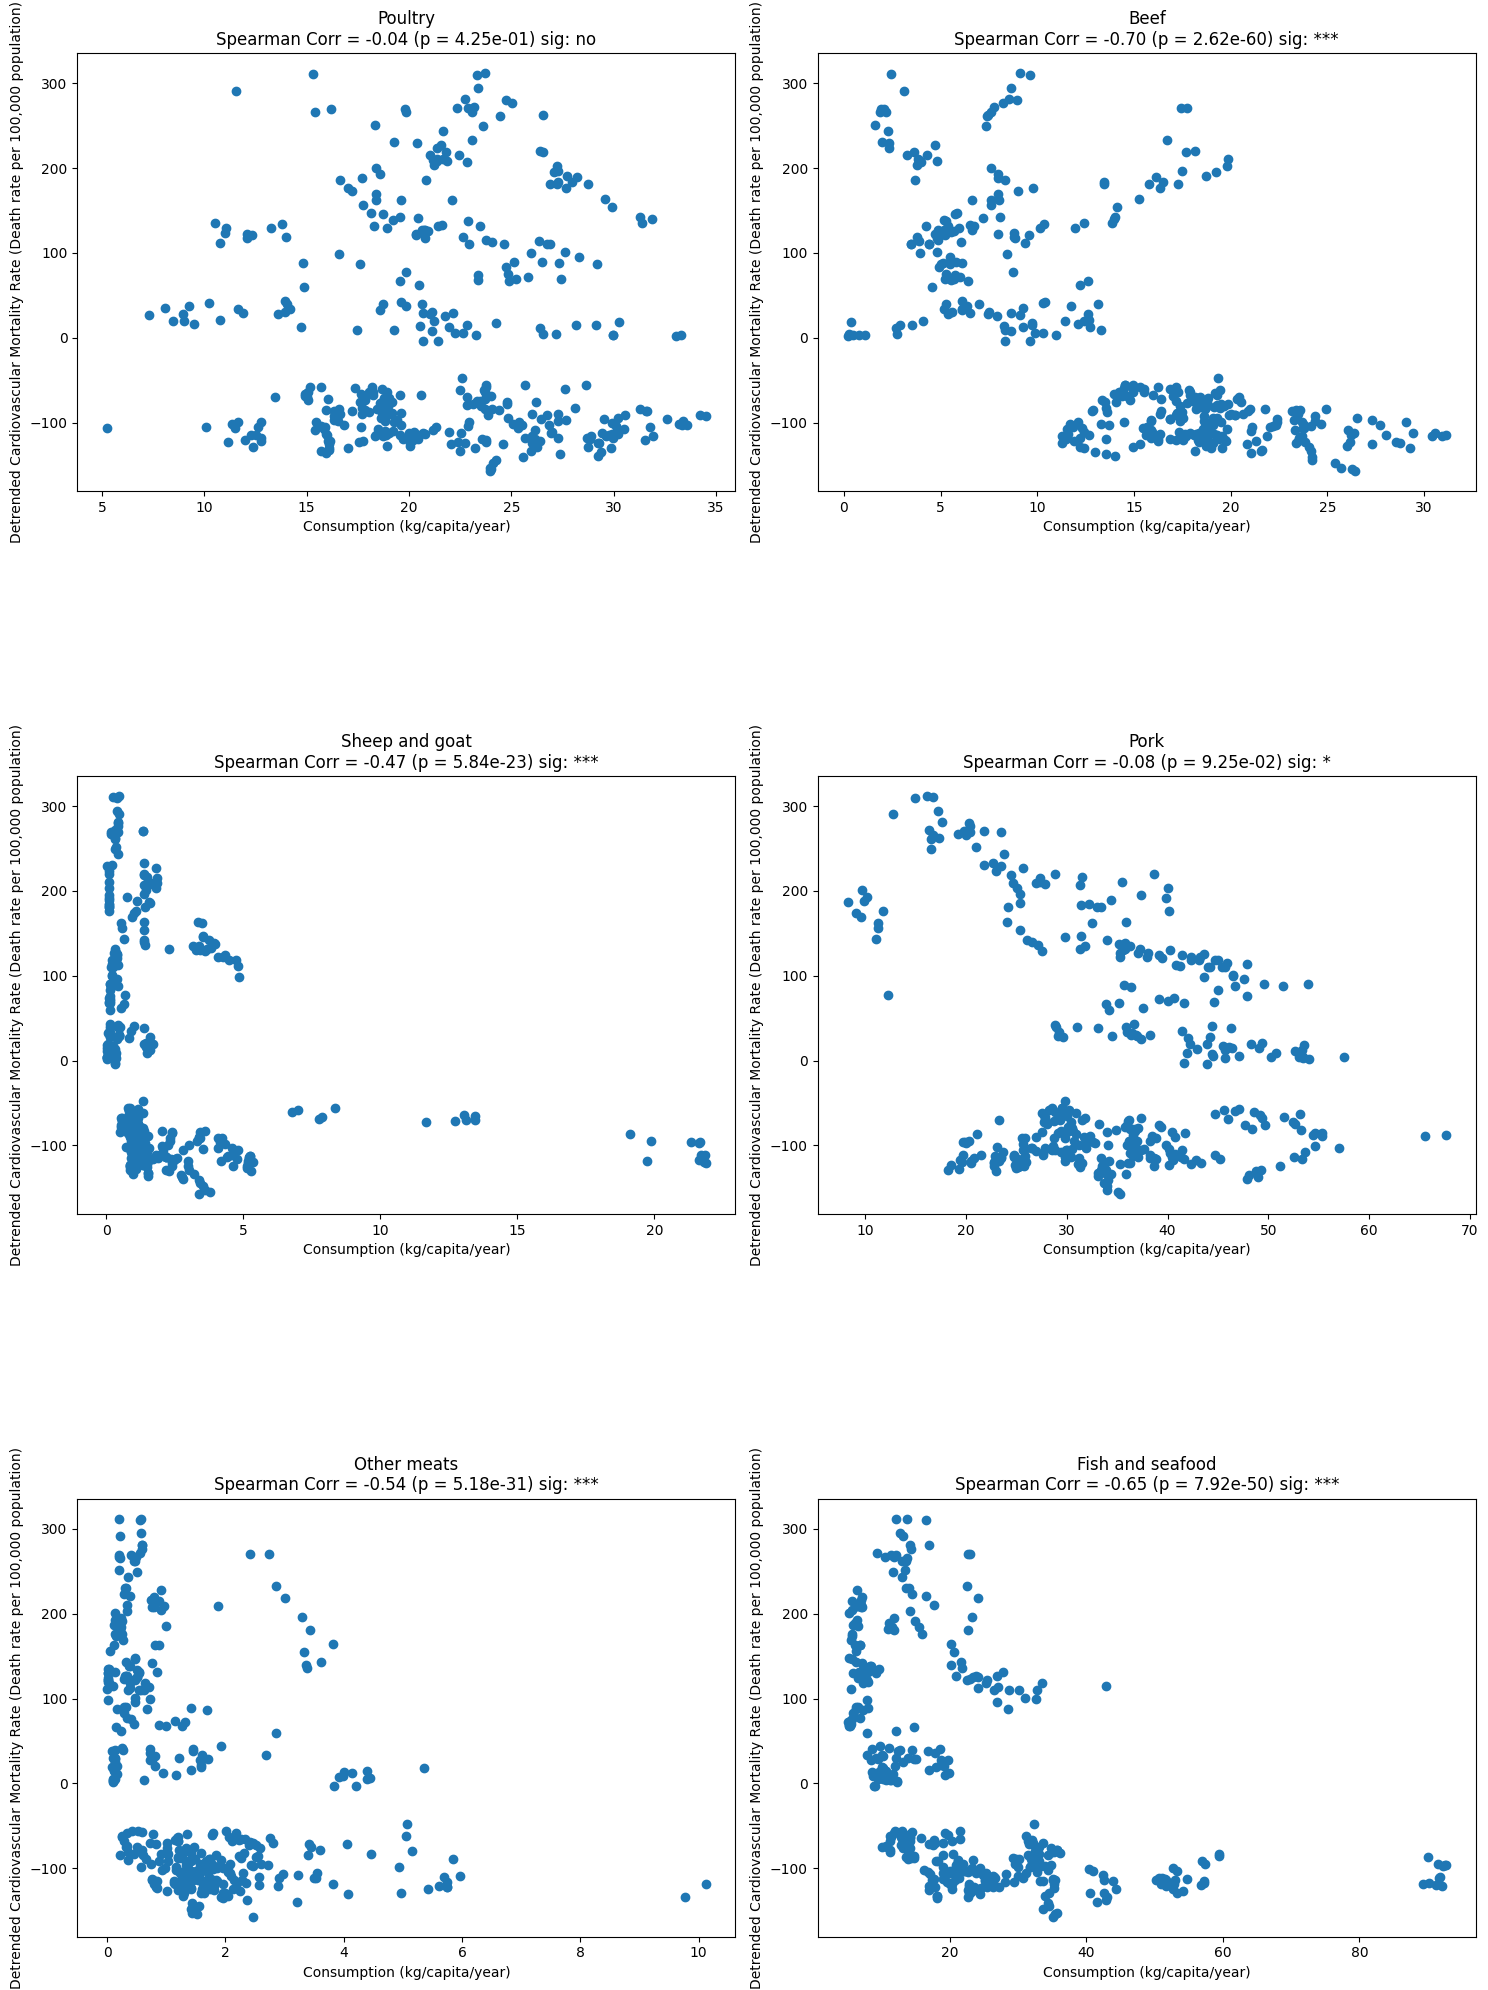

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.ravel()
for i, meat_type in enumerate(meat_mortality_df.columns[2:8]):
  # Test normality on detrended mortality rate
  stat_det, p_det = shapiro(mortality_cardio_meat_df['Detrended Cardio'])
  stat_meat, p_meat = shapiro(mortality_cardio_meat_df[meat_type])

  # Correlation analysis with detrended data
  if p_det > 0.05 and p_meat > 0.05:
      # Pearson correlation on detrended data
      corr, p_corr = pearsonr(mortality_cardio_meat_df['Detrended Cardio'], mortality_cardio_meat_df[meat_type])
      method = "Pearson"
      if p_corr < 0.01:
        sig = "***"
      elif p_corr < 0.05:
        sig = "**"
      elif p_corr < 0.1:
        sig = "*"
      else:
        sig = "no"
  else:
      # Spearman correlation if normality is violated
      corr, p_corr = spearmanr(mortality_cardio_meat_df['Detrended Cardio'], mortality_cardio_meat_df[meat_type])
      method = "Spearman"
      if p_corr < 0.01:
        sig = "***"
      elif p_corr < 0.05:
        sig = "**"
      elif p_corr < 0.1:
        sig = "*"
      else:
        sig = "no"
  axes[i].scatter(mortality_cardio_meat_df[meat_type], mortality_cardio_meat_df['Detrended Cardio'],)
  axes[i].set_title(f"{meat_type}\n{method} Corr = {corr:.2f} (p = {p_corr:.2e}) sig: {sig}")
  axes[i].set_xlabel("Consumption (kg/capita/year)")
  axes[i].set_ylabel("Detrended Cardiovascular Mortality Rate (Death rate per 100,000 population)")
plt.tight_layout()
plt.subplots_adjust(hspace=0.65) 
plt.show()

### Clustering and Statistical Tests

To further analyze if the particular meat consumption pattern impacts the mortality rate or the cardiovascular mortality rate, we divide countries into clusters based on the pattern. Then, the difference between the rates is checked for statistical significance.

Each country can be considered as an instance with 6 features, and each feature represents the meat consumption on a specific meat type.
Also, we will take the average of the detrended mortality rate and the average of the detrended cardiovascular mortality rate since the trend in both is removed.

To cluster each instance/country, we use K-Means, which requires normalization (this is done on each column with StandardScaler). After several attempts, we found that the data most likely have 3 clusters, so we use n_cluster=3.
Since instances have 6 dimensions, we use TSNE to plot the clustering relationship.

In [45]:
# Take subset of dataframe and calculate the mean for each country
subset = mortality_cardio_meat_df[["Country","Year","Poultry","Beef","Sheep and goat",\
    "Pork", "Other meats","Fish and seafood", "Detrended Mortality", "Detrended Cardio"]]

mean_df = subset.groupby("Country").mean().drop("Year", axis=1)
mean_df

Poultry       Beef  Sheep and goat       Pork  Other meats  \
Country                                                                         
Austria          18.358319  16.334584        1.139449  53.125633     1.160206   
Belarus          26.857572  17.034251        0.100693  36.011505     0.262902   
Belgium          12.127478  14.498415        1.267951  34.283450     1.747471   
Bulgaria         21.587075   3.977943        1.630770  27.455842     0.943867   
Croatia          10.340389  11.608531        1.339320  45.811987     1.077695   
Czechia          21.829005   9.365445        0.303766  44.507237     3.934816   
Denmark          23.173784  26.415316        0.883592  22.630128     1.183596   
Estonia          20.501491   9.065863        0.472218  34.758988     0.154223   
Finland          18.998893  18.555236        0.550951  35.633897     1.241979   
France           25.207528  24.635822        3.260261  34.104219     1.501918   
Germany          17.768858  13.896081        0.808950  50.387441     2.160810   
Greece           17.087051  16.391216       10.476504  28.783178     2.463538   
Hungary          25.335575   5.657518        0.133659  44.441790     0.684725   
Iceland          27.670975  14.464509       21.115544  20.214519     3.282208   
Ireland          25.161885  21.262309        3.452471  30.227221     1.149845   
Italy            18.685584  19.533660        1.026789  39.078899     3.694788   
Latvia           21.047252   5.387744        0.356187  38.975385     0.402538   
Lithuania        25.917138   4.351509        0.246712  45.916162     0.534321   
Luxembourg       19.618458  28.861348        1.643665  38.128897     1.879157   
Malta            23.426951  19.820172        1.326041  30.147937     4.097530   
Moldova          18.096913   2.199247        0.261452  20.523838     0.261446   
Netherlands      17.578519  16.348834        0.978313  31.757607     4.314058   
North Macedonia  18.250975   8.240191        0.944167  10.403893     0.170972   
Norway           20.039439  18.590676        5.142491  23.889289     1.375619   
Poland           28.655371   1.731010        0.036321  51.920304     0.116219   
Portugal         30.519270  18.808364        2.316145  41.122559     1.278082   
Romania          20.199124   6.125404        3.536477  33.178192     0.558456   
Russia           27.724901  15.961267        1.382266  24.326615     3.200806   
Serbia           12.497465   9.692516        4.070921  40.142611     0.014113   
Slovakia         14.467897   5.434850        0.136473  33.703789     1.718288   
Slovenia         24.570835  17.841247        0.879927  32.045360     0.375419   
Spain            30.068865  12.537433        2.347516  51.395295     1.912441   
Sweden           16.097659  23.451049        1.353753  33.725776     1.517448   
Switzerland      16.203425  20.298483        1.473790  30.919701     1.603833   
Ukraine          23.976647   8.242176        0.368485  17.296378     0.537712   
United Kingdom   31.242739  18.616894        4.528549  25.562176     1.236926   

                 Fish and seafood  Detrended Mortality  Detrended Cardio  
Country                                                                   
Austria                 14.049818          -119.017555        -73.550872  
Belarus                 13.761986           269.629792        192.414410  
Belgium                 24.778857          -106.280084       -111.246483  
Bulgaria                 6.541777           187.104392        210.254238  
Croatia                 18.493926            41.547245         24.338479  
Czechia                  9.446612            -0.996792          7.621607  
Denmark                 23.546337           -85.491757       -116.815312  
Estonia                 13.297650            36.127351         39.100041  
Finland                 34.139380          -111.014033        -76.235685  
France                  34.664010          -154.301256       -137.896014  
Germany                 13.581727       

In [46]:
# Make a copy so that the changes will not be applied to the original dataframe
data = copy.deepcopy(mean_df)
data = data.drop(["Detrended Mortality", "Detrended Cardio"], axis=1)

# Standardization & Normalization
for column in data.columns:
	data[column] = StandardScaler().fit_transform(mean_df[[column]])

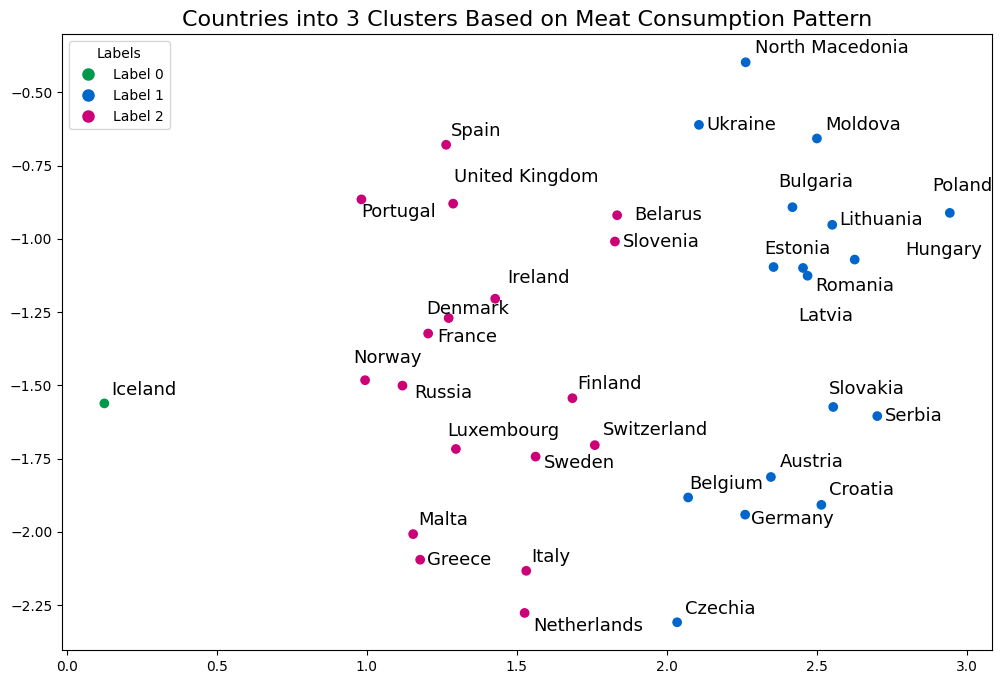

In [47]:
# Perform K-Means clustering with 3 clusters
model = KMeans(n_clusters=3, random_state=42, n_init="auto")
labels = model.fit_predict(data.values)

# Reduce the dimensionality of data to 2D using TSNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
data_2d = tsne.fit_transform(data)


# Make a scatterplot of the clusters
fig, ax = plt.subplots(figsize=(12, 8))
custom_cmap = ListedColormap(["#00994C", "#0066CC", "#CC0077"]) # Custom colors for better visualization
scatter = ax.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap=custom_cmap, alpha=1.0)
unique_labels = np.unique(labels)

# Create custom legend for the plot
handles = [
				plt.Line2D([0], [0], marker="o", color=scatter.cmap(scatter.norm(l)), linestyle="", markersize=8, label=f"Label {l}")
				for l in unique_labels
	]
plt.legend(handles=handles, title="Labels", loc="upper left")  # Place legend at the top-left corner

# Adjust the country name positions to avoid overlap
texts = [ax.text(data_2d[:, 0][i], data_2d[:, 1][i], label, fontsize=13) for i, label in enumerate(european_countries) ]
adjust_text(texts, ax=ax, only_move={'points': 'y', 'texts': 'xy'}, expand=(1.2, 1.5))

# Give the plot a title
plt.title(f"Countries into 3 Clusters Based on Meat Consumption Pattern", fontsize=16)
plt.show()

According to the TSNE plot, we can see that Iceland is isolated and has its own cluster.
We drop Iceland due to it having a cluster for itself, which is likely caused by its large "fish and seafood" and "goat and sheep" meat consumption. It will not be analyzed further because we cannot run a statistical test if the cluster has only one instance.

In [48]:
# Remove Iceland
mean_df["Label"] = labels
mean_df=mean_df.drop("Iceland", axis = 0)

There are two dataframes, one for each large group formed during the clustering: group1 (Label1) and group2 (Label2).

In [49]:
# Create the two dataframes
group1 = mean_df[mean_df['Label'] == 1]
group2 = mean_df[mean_df['Label'] == 2]
display(group1)
display(group2)

Poultry       Beef  Sheep and goat       Pork  Other meats  \
Country                                                                         
Austria          18.358319  16.334584        1.139449  53.125633     1.160206   
Belgium          12.127478  14.498415        1.267951  34.283450     1.747471   
Bulgaria         21.587075   3.977943        1.630770  27.455842     0.943867   
Croatia          10.340389  11.608531        1.339320  45.811987     1.077695   
Czechia          21.829005   9.365445        0.303766  44.507237     3.934816   
Estonia          20.501491   9.065863        0.472218  34.758988     0.154223   
Germany          17.768858  13.896081        0.808950  50.387441     2.160810   
Hungary          25.335575   5.657518        0.133659  44.441790     0.684725   
Latvia           21.047252   5.387744        0.356187  38.975385     0.402538   
Lithuania        25.917138   4.351509        0.246712  45.916162     0.534321   
Moldova          18.096913   2.199247        0.261452  20.523838     0.261446   
North Macedonia  18.250975   8.240191        0.944167  10.403893     0.170972   
Poland           28.655371   1.731010        0.036321  51.920304     0.116219   
Romania          20.199124   6.125404        3.536477  33.178192     0.558456   
Serbia           12.497465   9.692516        4.070921  40.142611     0.014113   
Slovakia         14.467897   5.434850        0.136473  33.703789     1.718288   
Ukraine          23.976647   8.242176        0.368485  17.296378     0.537712   

                 Fish and seafood  Detrended Mortality  Detrended Cardio  \
Country                                                                    
Austria                 14.049818          -119.017555        -73.550872   
Belgium                 24.778857          -106.280084       -111.246483   
Bulgaria                 6.541777           187.104392        210.254238   
Croatia                 18.493926            41.547245         24.338479   
Czechia                  9.446612            -0.996792          7.621607   
Estonia                 13.297650            36.127351         39.100041   
Germany                 13.581727           -99.478363        -73.289086   
Hungary                  5.656525           131.115095         77.001807   
Latvia                  24.302582           169.258595        123.599971   
Lithuania               30.951553           158.535194        106.614749   
Moldova                 12.952172           335.812478        259.294750   
North Macedonia          5.959104           170.010002        166.143822   
Poland                  11.177899            42.938433          9.337898   
Romania                  6.939308           163.264776        142.098406   
Serbia                   7.592625           171.925988        122.197861   
Slovakia                 8.779853            77.209958         45.990616   
Ukraine                 13.261206           308.579175        278.780513   

                 Label  
Country                 
Austria              1  
Belgium              1  
Bulgaria             1  
Croatia              1  
Czechia              1  
Estonia              1  
Germany              1  
Hungary              1  
Latvia               1  
Lithuania            1  
Moldova              1  
North Macedonia      1  
Poland               1  
Romania              1  
Serbia               1  
Slovakia             1  
Ukraine              1

Poultry       Beef  Sheep and goat       Pork  Other meats  \
Country                                                                        
Belarus         26.857572  17.034251        0.100693  36.011505     0.262902   
Denmark         23.173784  26.415316        0.883592  22.630128     1.183596   
Finland         18.998893  18.555236        0.550951  35.633897     1.241979   
France          25.207528  24.635822        3.260261  34.104219     1.501918   
Greece          17.087051  16.391216       10.476504  28.783178     2.463538   
Ireland         25.161885  21.262309        3.452471  30.227221     1.149845   
Italy           18.685584  19.533660        1.026789  39.078899     3.694788   
Luxembourg      19.618458  28.861348        1.643665  38.128897     1.879157   
Malta           23.426951  19.820172        1.326041  30.147937     4.097530   
Netherlands     17.578519  16.348834        0.978313  31.757607     4.314058   
Norway          20.039439  18.590676        5.142491  23.889289     1.375619   
Portugal        30.519270  18.808364        2.316145  41.122559     1.278082   
Russia          27.724901  15.961267        1.382266  24.326615     3.200806   
Slovenia        24.570835  17.841247        0.879927  32.045360     0.375419   
Spain           30.068865  12.537433        2.347516  51.395295     1.912441   
Sweden          16.097659  23.451049        1.353753  33.725776     1.517448   
Switzerland     16.203425  20.298483        1.473790  30.919701     1.603833   
United Kingdom  31.242739  18.616894        4.528549  25.562176     1.236926   

                Fish and seafood  Detrended Mortality  Detrended Cardio  Label  
Country                                                                         
Belarus                13.761986           269.629792        192.414410      2  
Denmark                23.546337           -85.491757       -116.815312      2  
Finland                34.139380          -111.014033        -76.235685      2  
France                 34.664010          -154.301256       -137.896014      2  
Greece                 18.791092          -110.468812        -65.790188      2  
Ireland                21.297362          -114.380480        -94.708322      2  
Italy                  28.221638          -166.943526       -104.265375      2  
Luxembourg             32.525785          -156.460569       -108.020542      2  
Malta                  32.293680          -134.346410        -76.281711      2  
Netherlands            22.096728          -127.797998       -117.550382      2  
Norway                 51.859517          -146.038607       -118.522590      2  
Portugal               56.183102          -103.070765       -103.503268      2  
Russia                 22.007621           327.894980        191.552675      2  
Slovenia               11.294669           -90.800017        -67.862611      2  
Spain                  42.276586          -167.914852       -121.349204      2  
Sweden                 32.368884          -146.666216        -95.313362      2  
Switzerland            17.364547          -183.014615       -119.172022      2  
United Kingdom         19.459389          -108.246675       -108.529207      2

To run the statistical test, we check the normality of each group and the heterogeneity between groups.
The normality is checked with the Shapiro-Wilk test again, which shows the distribution is not normal if there is statistical significance.
The heterogeneity is checked with the Levene test, which shows heterogeneity if there is statistical significance.

In [50]:
# Get the Detrended Mortality
group1 = group1['Detrended Mortality']
group2 = group2['Detrended Mortality']

# Normality check
stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)

# Check variance equality
levene_stat, levene_p = levene(group1, group2)
print(f"Group1 normality: {p1:.4e} \
      \nGroup2 normality: {p2:.4e} \
      \nHeterogeneity: {levene_p:.4e}")

Group1 normality: 3.4301e-01       
Group2 normality: 3.5312e-06       
Heterogeneity: 3.4183e-01


We assume there is independence because of the different types of meat consumption patterns. Group 2 did not show normality, and the two groups are from the same variance group (homogeneity).

Therefore, we run the Mann-Whitney test with:

- H<small>0</small>: Group 1 and Group 2 have no statistically significant difference in the detrended mortality rate.

- H<small>a</small>: Group 1 has a significantly greater detrended mortality rate than Group 2.


In [51]:
# Run the statistical test
u_stat, u_p = mannwhitneyu(group1, group2, alternative='greater')
test_result = f"Mann-Whitney U test: U-statistic = {u_stat:.3f}, p-value = {u_p:.3e}"

# Display the results
results_summary = {
    "Normality Group 1 (p-value)": p1,
    "Normality Group 2 (p-value)": p2,
    "Variance Equality (Levene p-value)": levene_p,
    "Test Result": test_result
}
results_summary

{'Normality Group 1 (p-value)': 0.34301480650901794,
 'Normality Group 2 (p-value)': 3.531205038598273e-06,
 'Variance Equality (Levene p-value)': 0.34183427869457894,
 'Test Result': 'Mann-Whitney U test: U-statistic = 263.000, p-value = 1.507e-04'}

We reject the null hypothesis and conclude that Group 1 has significantly larger detrended mortality rate than Group 2.

Now, we chack the same thing for detrended cardiovascular mortality rate.

In [52]:
# Get the Detrended Cardio
group1 = mean_df[mean_df['Label'] == 1]['Detrended Cardio']
group2 = mean_df[mean_df['Label'] == 2]['Detrended Cardio']

# Normality check
stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)

# Check variance equality
levene_stat, levene_p = levene(group1, group2)
print(f"Group1 normality: {p1:.3e} \
      \nGroup2 normality: {p2:.3e} \
      \nHeterogeneity: {levene_p:.3e}")

Group1 normality: 8.685e-01       
Group2 normality: 2.964e-06       
Heterogeneity: 1.164e-01


We assume there is independence because of the different types of meat consumption patterns. Group 2 did not show normality, and the two groups are from the same variance group (homogeneity).

Therefore, we run the Mann-Whitney test with:

- H<small>0</small>: Group 1 and Group 2 have no statistically significant difference in the detrended cardiovascular mortality rate.

- H<small>a</small>: Group 1 has a significantly greater detrended cardiovascular mortality rate than Group 2.


In [53]:
# Run the statistical test
u_stat, u_p = mannwhitneyu(group1, group2, alternative='greater')
test_result = f"Mann-Whitney U test: U-statistic = {u_stat:.3f}, p-value = {u_p:.3e}"

# Display the results
results_summary = {
    "Normality Group 1 (p-value)": p1,
    "Normality Group 2 (p-value)": p2,
    "Variance Equality (Levene p-value)": levene_p,
    "Test Result": test_result
}
results_summary

{'Normality Group 1 (p-value)': 0.8685072660446167,
 'Normality Group 2 (p-value)': 2.9642810659424867e-06,
 'Variance Equality (Levene p-value)': 0.11639044795762596,
 'Test Result': 'Mann-Whitney U test: U-statistic = 264.000, p-value = 1.326e-04'}

We reject the null hypothesis and conclude that Group 1 has significantly larger detrended cardiovascular mortality rate than Group 2.

Based on the difference between Group 1 and Group 2, we can say that "beef" and "fish and seafood" consumption probably have an impact on the mortality rate and the cardiovascular mortality rate. Group 1 consumes much less beef and fish and seafood than Group 2.
Group 1 consumes slightly more pork than Group 2, but all other categories are consumed more by Group 2.
We show the overall mean for Group 1 and Group 2.

In [54]:
group1 = mean_df[mean_df['Label'] == 1].mean()
group2 = mean_df[mean_df['Label'] == 2].mean()
display(group1)
display(group2)

Poultry                19.468057
Beef                    7.988766
Sheep and goat          1.003134
Pork                   36.872525
Other meats             0.951640
Fish and seafood       13.397835
Detrended Mortality    98.097405
Detrended Cardio       79.664018
Label                   1.000000
dtype: float64

Poultry                22.903520
Beef                   19.720199
Sheep and goat          2.395762
Pork                   32.749459
Other meats             1.904994
Fish and seafood       28.564017
Detrended Mortality   -83.857323
Detrended Cardio      -69.324928
Label                   2.000000
dtype: float64